<a href="https://colab.research.google.com/github/Migdalia2023/DS_UNI/blob/main/MLSA/Tarea_Final_MLSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caso Contactabilidad - Examen Final
Curso: Machine Learning Supervised Advance
Alumna: Migdalia Gonzales Ramos
Ciclo: II

## Librerías

In [2]:
# Instalando directorios requeridos de Python
import subprocess
import sys

def instala_por_conveniencia(package):
    try:
        __import__(package)
        print(f"El directorio {package} ya está instalado.")
    except ImportError:
        print(f"Instalando el directorio {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Directorio {package} instalado con éxito.")

# Directorios a verificar e instalar
packages = ["skimpy", "sweetviz", "MissForest"]

# Revisar e instalar los directorios necesarios
for package in packages:
    instala_por_conveniencia(package)

Instalando el directorio skimpy...
Directorio skimpy instalado con éxito.
Instalando el directorio sweetviz...
Directorio sweetviz instalado con éxito.
Instalando el directorio MissForest...
Directorio MissForest instalado con éxito.


In [3]:
# Importando las librerías necesarias para el (los) modelo(s) analítico(s)

#Librerías generales
import pandas as pd
import numpy as np
from sklearn import metrics
import warnings
from sklearn import preprocessing
from skimpy import skim
import sweetviz as sv
import missingno as msno

## Estadística
from scipy.stats import binom, trim_mean, stats
from sklearn.metrics import matthews_corrcoef
from statistics import median, mean, mode

## Librerías para los modelos de Machine Learning
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from missforest.missforest import MissForest

# PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##################### MODELOS - Depurar los que no utilizaré y agregar los que serán utilizados###################
#from sklearn.cluster import DBSCAN
#from sklearn.cluster import KMeans
#from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#from sklearn.cluster import SpectralClustering
#from sklearn.cluster import MiniBatchKMeans
#from sklearn.cluster import AgglomerativeClustering
#from sklearn.cluster import Birch
#from sklearn.cluster import MeanShift

################## REDES NEURONALES################ idem
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

## Librerías para conocer las métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

## Selección de Variables
from sklearn.model_selection import train_test_split

## Librerías para visualización de la data
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para visualización de gráficos dinámicos, y en 3D
import plotly.express as px

# Objetos de Py a R##########################idem
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

# Configuraciones
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')
%matplotlib inline


## Valor de semilla que se utilizará siempre que sea necesario
seed = 16
np.random.seed(seed)

In [4]:
# Funciones para descargar archivos desde Google Drive y no se complique la lectura de datasets
import gdown
import pandas as pd
import os

def instalar_desde_Google_Drive(enlace_original, nombre_archivo='archivo'):
    """
    Convierte un enlace de Google Drive a un enlace de descarga directa y descarga el file.

    Parámetros:
    enlace_original (str): Enlace de Google Drive en formato de vista previa.
    nombre_archivo (str): Nombre del archivo de salida.

    Retorna:
    str: El nombre del archivo descargado.
    """
    def convertir_enlace_gdown(enlace_original):
        file_id = enlace_original.split('/')[5]
        return f'https://drive.google.com/uc?id={file_id}'

    url = convertir_enlace_gdown(enlace_original)

    try:
        gdown.download(url, nombre_archivo, quiet=False)
        if not os.path.exists(nombre_archivo):
            raise FileNotFoundError("No se pudo descargar el file. Puede que no sea accesible.")
    except Exception as e:
        print(f"Error: {e}")
        print("Verifica los permisos del archivo o usa otro método de compartición.")
        return None
    else:
        return nombre_archivo



In [5]:
# Uso de la función instalar_desde_Google_Drive
URL = 'https://drive.google.com/file/d/1k4IAlulh5mTn5Ok2hqGCsiOl9YuGGck6/view?usp=sharing'
nombre_extension = 'data_selec_entre.csv' # Colocar su extensión del archivo

# Descargar el archivo
instalar_desde_Google_Drive(URL, nombre_extension)

# Leer el archivo, usar función de acuerdo a su extensión
data_Contactabilidad_e = pd.read_csv(nombre_extension, na_values=['-999', -999, 'NULO', 'INF. NO DISPONIBLE'])

Downloading...
From (original): https://drive.google.com/uc?id=1k4IAlulh5mTn5Ok2hqGCsiOl9YuGGck6
From (redirected): https://drive.google.com/uc?id=1k4IAlulh5mTn5Ok2hqGCsiOl9YuGGck6&confirm=t&uuid=e98814af-c6ae-4868-917b-96cc0d8421ce
To: /content/data_selec_entre.csv
100%|██████████| 160M/160M [00:02<00:00, 76.1MB/s]


In [6]:
# Uso de la función instalar_desde_Google_Drive
URL = 'https://drive.google.com/file/d/11Ca3kqM2rJ_-VgMj53s1MjlIBZgM9fT8/view?usp=sharing'
nombre_extension = 'data_selec_test.csv' # Colocar su extensión del archivo

# Descargar el archivo
instalar_desde_Google_Drive(URL, nombre_extension)

# Leer el archivo, usar función de acuerdo a su extensión
data_Contactabilidad_p = pd.read_csv(nombre_extension, na_values=['-999', -999, 'NULO', 'INF. NO DISPONIBLE'])

Downloading...
From (original): https://drive.google.com/uc?id=11Ca3kqM2rJ_-VgMj53s1MjlIBZgM9fT8
From (redirected): https://drive.google.com/uc?id=11Ca3kqM2rJ_-VgMj53s1MjlIBZgM9fT8&confirm=t&uuid=6077f895-f73e-4f47-bddd-3060da1a7053
To: /content/data_selec_test.csv
100%|██████████| 121M/121M [00:03<00:00, 38.6MB/s]


### Leer los data set del caso de Negocio

In [7]:
#Mostrando el detalle del dataset de Entrenamiento
data_Contactabilidad_e.head(10)

#Target es igual a 1: contacto efectivo y 0: no contacto efectivo

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,FBK_ULT6,FBK_ULT12,FBK_BEST6,DIAS_BEST6,...,NT_CTD6,NT_DISTR6,NT_DIAS6,PROVINCIA,DEPARTAMENTO,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,SEGMENTO,RANGO_INGRESOS,TARGET
0,1,0.333333,6.0,6.0,3,118,TLV,TLV,TLV,8.0,...,NaN,NaN,NaN,TACNA,TACNA,7136.0,9389.0,2,Entre S/.4000-10000,1
1,1,0.461538,13.0,13.0,40,94,TLV,TLV,TLV,46.0,...,NaN,NaN,NaN,LIMA,LIMA,6920.0,9105.0,1BC,Entre S/.4000-10000,1
2,1,0.666667,2.0,6.0,6,223,TLV,TLV,TLV,127.0,...,NaN,NaN,NaN,LIMA,LIMA,1473.0,1655.0,2,Entre S/.1000-4000,1
3,1,NaN,4.0,4.0,95,96,TLV,TLV,TLV,49.0,...,NaN,NaN,NaN,LIMA,LIMA,2293.0,2729.0,2,Entre S/.1000-4000,1
4,1,0.187500,10.0,16.0,4,91,TLV,TLV,TLV,27.0,...,NaN,NaN,NaN,CUSCO,CUSCO,6470.0,8513.0,3,Entre S/.4000-10000,1
5,1,0.692308,4.0,13.0,4,114,TLV,TLV,TLV,41.0,...,NaN,NaN,NaN,LIMA,LIMA,5855.0,7703.0,2,Entre S/.4000-10000,1
6,1,0.500000,6.0,6.0,13,297,TLV,TLV,TLV,25.0,...,NaN,NaN,NaN,CAJAMARCA,CAJAMARCA,1726.0,2054.0,2,Entre S/.1000-4000,1
7,1,0.142857,7.0,7.0,40,78,TLV,TLV,TLV,13.0,...,1.0,0.142857,79.0,LIMA,LIMA,1116.0,1253.0,2,Entre S/.1000-4000,1
8,5,NaN,NaN,NaN,81,1340,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AREQUIPA,AREQUIPA,7110.0,9355.0,2,Entre S/.4000-10000,1
9,1,0.181818,11.0,11.0,3,39,TLV,TLV,TLV,5.0,...,1.0,0.090909,134.0,LIMA,LIMA,3535.0,4474.0,3,Entre S/.4000-10000,1


In [8]:
#Mostrando el detalle del dataset de Prueba
data_Contactabilidad_p.head(10)

#Target es igual a 1: contacto efectivo y 0: no contacto efectivo

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,FBK_ULT6,FBK_ULT12,FBK_BEST6,DIAS_BEST6,...,NT_CTD6,NT_DISTR6,NT_DIAS6,PROVINCIA,DEPARTAMENTO,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,SEGMENTO,RANGO_INGRESOS,TARGET
0,1,0.500000,NaN,2.0,4,85,NaN,TLV,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,2664.0,3171.0,2,Entre S/.1000-4000,0
1,2,NaN,NaN,NaN,79,34,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,2663.0,3170.0,2,Entre S/.1000-4000,0
2,1,NaN,NaN,NaN,95,62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,4421.0,5596.0,1BC,Entre S/.4000-10000,0
3,1,0.800000,5.0,5.0,95,98,TLV,TLV,TLV,127.0,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,2325.0,2767.0,3,Entre S/.1000-4000,0
4,1,0.400000,5.0,5.0,4,8,TLV,TLV,TLV,50.0,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,1233.0,1385.0,2,Entre S/.1000-4000,0
5,1,0.611111,9.0,18.0,4,202,TLV,TLV,TLV,64.0,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,2298.0,2735.0,3,Entre S/.1000-4000,0
6,5,1.000000,NaN,2.0,30,1170,NaN,TLV,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,2298.0,2735.0,3,Entre S/.1000-4000,0
7,5,1.000000,NaN,1.0,79,426,NaN,TLV,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,1234.0,1386.0,2,Entre S/.1000-4000,0
8,4,1.000000,NaN,1.0,79,426,NaN,TLV,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,1234.0,1386.0,2,Entre S/.1000-4000,0
9,2,NaN,NaN,NaN,27,539,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,1515.0,1702.0,3,Entre S/.1000-4000,0


In [9]:
data_Contactabilidad_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       757391 non-null  int64  
 1   NC_DISTR12            507452 non-null  float64
 2   TOTGEST6              565441 non-null  float64
 3   TOTGEST12             587885 non-null  float64
 4   IDGRUPO               757391 non-null  int64  
 5   DIAS_ACT              757391 non-null  int64  
 6   FBK_ULT6              565441 non-null  object 
 7   FBK_ULT12             587885 non-null  object 
 8   FBK_BEST6             565441 non-null  object 
 9   DIAS_BEST6            565441 non-null  float64
 10  DIAS_ULT6             565441 non-null  float64
 11  FBK_BEST12            587885 non-null  object 
 12  DIAS_BEST12           587885 non-null  float64
 13  DIAS_ULT12            587885 non-null  float64
 14  CNE_CTD12             302045 non-null  float64
 15  

In [10]:
data_Contactabilidad_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548214 entries, 0 to 548213
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       548214 non-null  int64  
 1   NC_DISTR12            297220 non-null  float64
 2   TOTGEST6              307847 non-null  float64
 3   TOTGEST12             336281 non-null  float64
 4   IDGRUPO               548214 non-null  int64  
 5   DIAS_ACT              548214 non-null  int64  
 6   FBK_ULT6              307847 non-null  object 
 7   FBK_ULT12             336281 non-null  object 
 8   FBK_BEST6             307847 non-null  object 
 9   DIAS_BEST6            307847 non-null  float64
 10  DIAS_ULT6             307847 non-null  float64
 11  FBK_BEST12            336281 non-null  object 
 12  DIAS_BEST12           336281 non-null  float64
 13  DIAS_ULT12            336281 non-null  float64
 14  CNE_CTD12             146645 non-null  float64
 15  

In [11]:
data_Contactabilidad_e.IDGRUPO.nunique()
#se puede consultar para cada variable

58

In [12]:
data_Contactabilidad_p.IDGRUPO.nunique()
#se puede consultar para cada variable

58

# Respondiendo al Punto Nro. 1 Análisis descriptivo del dataset de Entrenamiento y de Prueba

In [13]:
data_Contactabilidad_e.describe()

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,DIAS_BEST6,DIAS_ULT6,DIAS_BEST12,DIAS_ULT12,...,RECENCIA_APP,NT_CTD12,NT_DISTR12,NT_DIAS12,NT_CTD6,NT_DISTR6,NT_DIAS6,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,TARGET
count,757391.000000,507452.000000,565441.000000,587885.000000,757391.000000,757391.000000,565441.000000,565441.000000,587885.000000,587885.000000,...,75926.000000,51170.000000,51170.000000,51170.000000,35179.000000,35179.000000,35179.000000,7.560310e+05,7.560310e+05,757391.000000
mean,1.847453,0.549908,7.785355,9.677039,41.051548,307.155657,55.970856,39.544906,69.696592,48.049493,...,100.385309,1.130506,0.112237,168.977995,1.099065,0.137686,121.342591,3.768014e+03,4.852538e+03,0.650115
std,1.463758,0.273509,6.527689,8.569118,32.477939,494.100193,52.427788,44.757436,74.185721,61.857946,...,219.338757,0.388888,0.120987,88.085084,0.333550,0.136338,54.342772,3.974809e+03,5.811525e+03,0.476934
min,1.000000,0.005435,1.000000,1.000000,2.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.006579,0.000000,1.000000,0.007874,0.000000,3.690000e+02,4.140000e+02,0.000000
25%,1.000000,0.333333,3.000000,3.000000,4.000000,58.000000,15.000000,8.000000,16.000000,9.000000,...,4.000000,1.000000,0.050000,100.000000,1.000000,0.062500,81.000000,1.636000e+03,1.838000e+03,0.000000
50%,1.000000,0.500000,6.000000,7.000000,40.000000,133.000000,40.000000,22.000000,44.000000,23.000000,...,16.000000,1.000000,0.076923,164.000000,1.000000,0.100000,123.000000,2.760000e+03,3.285000e+03,1.000000
75%,2.000000,0.750000,11.000000,14.000000,58.000000,304.000000,81.000000,52.000000,97.000000,57.000000,...,82.000000,1.000000,0.125000,229.000000,1.000000,0.166667,169.000000,4.707000e+03,5.958000e+03,1.000000
max,10.000000,1.000000,188.000000,212.000000,95.000000,43129.000000,240.000000,240.000000,394.000000,393.000000,...,2220.000000,6.000000,1.000000,393.000000,6.000000,1.000000,212.000000,1.639737e+06,2.411377e+06,1.000000


In [14]:
data_Contactabilidad_p.describe()

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,DIAS_BEST6,DIAS_ULT6,DIAS_BEST12,DIAS_ULT12,...,RECENCIA_APP,NT_CTD12,NT_DISTR12,NT_DIAS12,NT_CTD6,NT_DISTR6,NT_DIAS6,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,TARGET
count,548214.000000,297220.000000,307847.000000,336281.000000,548214.000000,548214.000000,307847.000000,307847.000000,336281.000000,336281.000000,...,39862.000000,21229.000000,21229.000000,21229.000000,12104.00000,12104.000000,12104.000000,545863.000000,545863.000000,548214.000000
mean,2.297612,0.650498,6.873450,8.559803,45.939662,446.538104,72.163084,53.964391,98.127218,71.533899,...,109.886032,1.116727,0.121314,201.011164,1.07196,0.150821,151.913665,3730.749868,4801.699687,0.210217
std,1.691682,0.285051,6.189909,8.218877,35.287485,603.146236,56.355547,51.116574,85.752866,76.313801,...,241.249176,0.366973,0.144757,68.282104,0.28227,0.163392,40.500921,3457.444234,5044.182494,0.407463
min,1.000000,0.009709,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.008333,6.000000,1.00000,0.011111,6.000000,311.000000,349.000000,0.000000
25%,1.000000,0.416667,2.000000,3.000000,6.000000,98.000000,24.000000,15.000000,30.000000,16.000000,...,6.000000,1.000000,0.050000,147.000000,1.00000,0.062500,127.000000,1636.000000,1838.000000,0.000000
50%,2.000000,0.666667,5.000000,6.000000,40.000000,178.000000,54.000000,36.000000,69.000000,43.000000,...,20.000000,1.000000,0.076923,197.000000,1.00000,0.100000,157.000000,2709.000000,3225.000000,0.000000
75%,3.000000,1.000000,9.000000,12.000000,90.000000,523.000000,113.000000,73.000000,148.000000,100.000000,...,86.000000,1.000000,0.125000,253.000000,1.00000,0.166667,185.000000,4550.000000,5759.000000,0.000000
max,10.000000,1.000000,147.000000,160.000000,95.000000,43067.000000,213.000000,213.000000,332.000000,332.000000,...,2159.000000,6.000000,1.000000,331.000000,5.00000,1.000000,212.000000,499135.000000,734022.000000,1.000000


In [15]:
#mostrando los valores de la variable Target en este caso "TARGET"
#Dataset Entrenamiento
print(data_Contactabilidad_e['TARGET'].value_counts())
print(data_Contactabilidad_e['TARGET'].value_counts(normalize=True))

TARGET
1    492391
0    265000
Name: count, dtype: int64
TARGET
1    0.650115
0    0.349885
Name: proportion, dtype: float64


In [16]:
#mostrando los valores de la variable Target en este caso "TARGET"
#Dataset Prueba
print(data_Contactabilidad_p['TARGET'].value_counts())
print(data_Contactabilidad_p['TARGET'].value_counts(normalize=True))

TARGET
0    432970
1    115244
Name: count, dtype: int64
TARGET
0    0.789783
1    0.210217
Name: proportion, dtype: float64


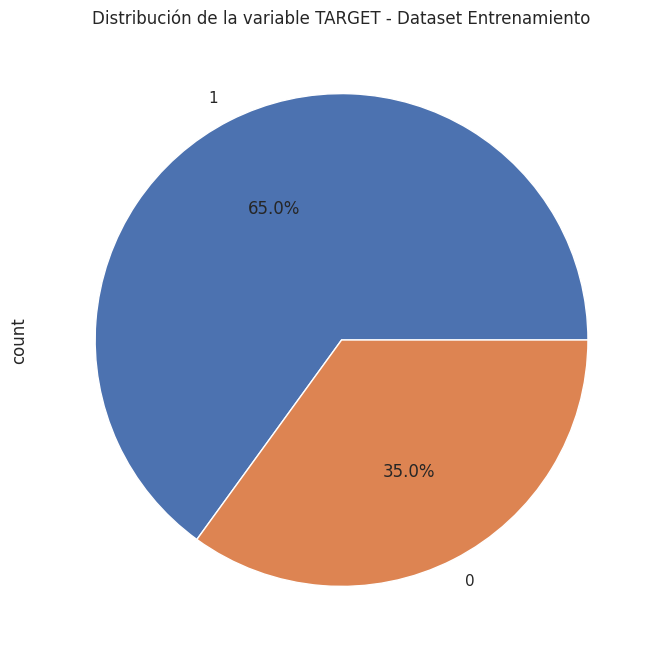

In [17]:
# Mostrando la variable TARGET en un gráfico de pie para conocer su distribución gráficamente
#Dataset Entrenamiento
plt.figure(figsize=(8, 8))
data_Contactabilidad_e['TARGET'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de la variable TARGET - Dataset Entrenamiento')
plt.show()
#Target donde valores 1: contacto efectivo y 0: no contacto efectivo,
#entonces el 65% de los datos de la variable TARGET corresponden a los contactos efectivos y el resto 35% corresponden a los contactos NO efectivos.

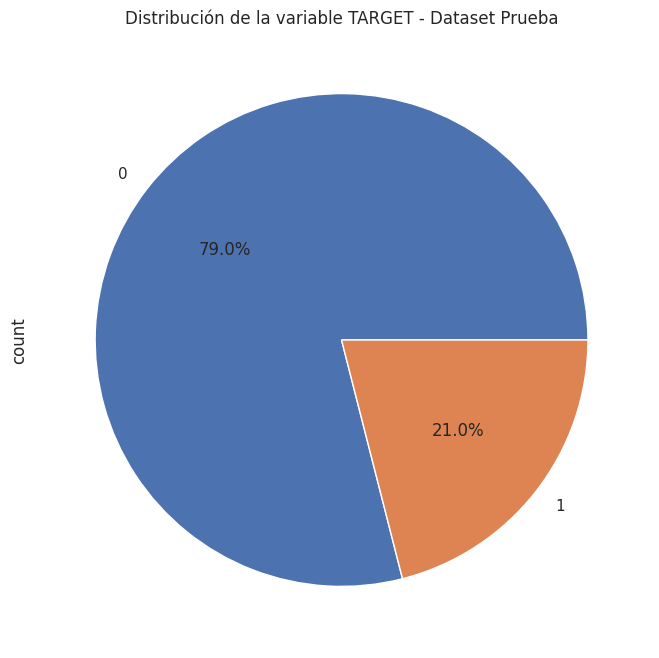

In [18]:
# Mostrando la variable TARGET en un gráfico de pie para conocer su distribución gráficamente
#Dataset Prueba
plt.figure(figsize=(8, 8))
data_Contactabilidad_p['TARGET'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de la variable TARGET - Dataset Prueba')
plt.show()
#Target donde valores 1: contacto efectivo y 0: no contacto efectivo,
#entonces el 65% de los datos de la variable TARGET corresponden a los contactos efectivos y el resto 35% corresponden a los contactos NO efectivos.

# Respondiendo al Punto Nro. 2 Ingeniería de variables (Transformaciones, imputación de nulos, etc.) del dataset de Entrenamiento y de Prueba

###Cambiando los valores Nulos -999, INF. NO DISPONIBLE Y NULO con NaN de Numpy

In [19]:
#reemplazando los valores '-999', 'INF. NO DISPONIBLE' y 'NULO' por un valor Nulo (NaN) usando la biblioteca NumPy para hacer más fácil el análisis
#NO es necesario puesto con la lectura de datos desde Drive se realizó
#import pandas as pd
#import numpy as np

#def clearDataValues(dataInput):
 #   dataFrame = pd.DataFrame(dataInput)
 #   dataFrame = dataFrame.replace(-999, np.NaN)
 #   dataFrame = dataFrame.replace('-999', np.NaN)
 #   dataFrame = dataFrame.replace('INF. NO DISPONIBLE', np.NaN)
 #   dataFrame = dataFrame.replace('NULO', np.NaN)

 #   return dataFrame

#dataMasterContactabilidadEntre=clearDataValues(data_contactabilidad)
#dataMasterContactabilidadPrueba=clearDataValues(data_contactabilidad_p)


#print ('\n --- Data Entrenamiento --- \n')
#print (dataMasterContactabilidadEntre)
#print ('\n --- Data Prueba --- \n')
#print (dataMasterContactabilidadPrueba)

In [20]:
df_dataMasterEntrenamiento=data_Contactabilidad_e.copy()
df_dataMasterEntrenamiento

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,FBK_ULT6,FBK_ULT12,FBK_BEST6,DIAS_BEST6,...,NT_CTD6,NT_DISTR6,NT_DIAS6,PROVINCIA,DEPARTAMENTO,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,SEGMENTO,RANGO_INGRESOS,TARGET
0,1,0.333333,6.0,6.0,3,118,TLV,TLV,TLV,8.0,...,NaN,NaN,NaN,TACNA,TACNA,7136.0,9389.0,2,Entre S/.4000-10000,1
1,1,0.461538,13.0,13.0,40,94,TLV,TLV,TLV,46.0,...,NaN,NaN,NaN,LIMA,LIMA,6920.0,9105.0,1BC,Entre S/.4000-10000,1
2,1,0.666667,2.0,6.0,6,223,TLV,TLV,TLV,127.0,...,NaN,NaN,NaN,LIMA,LIMA,1473.0,1655.0,2,Entre S/.1000-4000,1
3,1,NaN,4.0,4.0,95,96,TLV,TLV,TLV,49.0,...,NaN,NaN,NaN,LIMA,LIMA,2293.0,2729.0,2,Entre S/.1000-4000,1
4,1,0.187500,10.0,16.0,4,91,TLV,TLV,TLV,27.0,...,NaN,NaN,NaN,CUSCO,CUSCO,6470.0,8513.0,3,Entre S/.4000-10000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2,1.000000,4.0,4.0,95,99,TLV,TLV,TLV,17.0,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,3535.0,4474.0,3,Entre S/.4000-10000,0
757387,1,NaN,NaN,NaN,40,66,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LIMA,LIMA,1320.0,1483.0,1A,Entre S/.1000-4000,0
757388,2,0.500000,2.0,2.0,40,169,TLV,TLV,TLV,169.0,...,NaN,NaN,NaN,LIMA,LIMA,1563.0,1756.0,2,Entre S/.1000-4000,0
757389,1,NaN,NaN,NaN,3,43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LIMA,LIMA,1383.0,1553.0,2,Entre S/.1000-4000,0


In [21]:
df_dataMasterPrueba=data_Contactabilidad_p.copy()
df_dataMasterPrueba

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,FBK_ULT6,FBK_ULT12,FBK_BEST6,DIAS_BEST6,...,NT_CTD6,NT_DISTR6,NT_DIAS6,PROVINCIA,DEPARTAMENTO,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,SEGMENTO,RANGO_INGRESOS,TARGET
0,1,0.5,NaN,2.0,4,85,NaN,TLV,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,2664.0,3171.0,2,Entre S/.1000-4000,0
1,2,NaN,NaN,NaN,79,34,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,2663.0,3170.0,2,Entre S/.1000-4000,0
2,1,NaN,NaN,NaN,95,62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,4421.0,5596.0,1BC,Entre S/.4000-10000,0
3,1,0.8,5.0,5.0,95,98,TLV,TLV,TLV,127.0,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,2325.0,2767.0,3,Entre S/.1000-4000,0
4,1,0.4,5.0,5.0,4,8,TLV,TLV,TLV,50.0,...,NaN,NaN,NaN,CORONEL PORTILLO,UCAYALI,1233.0,1385.0,2,Entre S/.1000-4000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1,NaN,NaN,NaN,30,1874,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,826.0,928.0,5,Entre S/.600-1000,0
548210,1,NaN,NaN,NaN,95,62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AREQUIPA,AREQUIPA,4772.0,6040.0,1BC,Entre S/.4000-10000,0
548211,1,NaN,NaN,NaN,64,128,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LIMA,LIMA,NaN,NaN,NaN,Sin ingresos,1
548212,2,NaN,NaN,NaN,40,507,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LIMA,LIMA,2366.0,2816.0,3,Entre S/.1000-4000,0


In [22]:
#Exportando la data df_dataMasterEntrenamiento a un CSV file para ser reutilizado fácilmente
import os
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_dataMasterEntrenamiento.to_csv('df_dataMasterEntrenamiento.csv', index=False)

Ubicación actual de trabajo: /content


In [23]:
#Exportando la data df_dataMasterPrueba a un CSV file para ser reutilizado fácilmente
import os
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_dataMasterPrueba.to_csv('df_dataMasterPrueba.csv', index=False)

Ubicación actual de trabajo: /content


In [24]:
#Mostrando los valores Nulos y sus porcentajes por cada variable y por cada Data Entrenamiento
def get_Data_Frame_Null(datamaster):
    # Contando los valores nulos por variable
    conteo_nulos = datamaster.isna().sum()

    # Calculando el porcentaje de nulos por columna
    porcentaje_nulos = (conteo_nulos / len(datamaster)) * 100

    # Creando un nuevo DataFrame con los resultados
    dataframe_nulos = pd.DataFrame({'Nulos': conteo_nulos, 'Porcentaje_de_Nulos': porcentaje_nulos})

    # Ordenando el DataFrame por la cantidad de nulos de manera descendente
    dataframe_nulos = dataframe_nulos.sort_values(by='Nulos', ascending=False)

    return dataframe_nulos

print ('\n --- Data Nulos Entrenamiento --- \n')
print (get_Data_Frame_Null(df_dataMasterEntrenamiento))
print ('\n --- Data Nulos Prueba --- \n') #Esto correspondería para la data de VALIDACIÓN
print (get_Data_Frame_Null(df_dataMasterPrueba))



 --- Data Nulos Entrenamiento --- 

                       Nulos  Porcentaje_de_Nulos
NT_DIAS6              722212            95.355239
NT_DISTR6             722212            95.355239
NT_CTD6               722212            95.355239
NT_DIAS12             706221            93.243912
NT_DISTR12            706221            93.243912
NT_CTD12              706221            93.243912
RECENCIA_APP          681465            89.975323
CNE_CTD6              496789            65.592145
CNE_DISTR6            496789            65.592145
CNE_DIAS6             496789            65.592145
CNE_DIAS12            455346            60.120334
CNE_CTD12             455346            60.120334
CNE_DISTR12           455346            60.120334
NC_CTD6               283215            37.393500
NC_DIAS6              283215            37.393500
NC_DIAS12             249939            32.999996
NC_DISTR12            249939            32.999996
NC_CTD12              249939            32.999996
DIAS_ULT6    

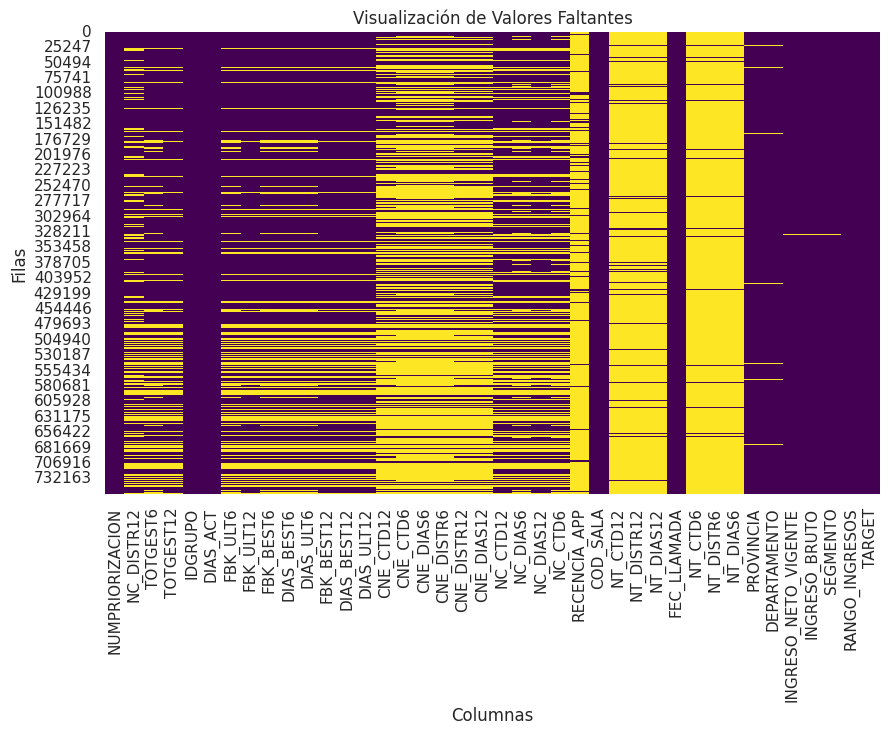

In [25]:
# Asegúrate de tener installed missingno y seaborn
!pip install missingno
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame booleano indicando valores faltantes
missing_data = df_dataMasterEntrenamiento.isnull()

# Configuración del estilo y tamaño de la figura
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Usar un mapa de calor para visualizar los datos faltantes
sns.heatmap(missing_data, cmap="viridis", cbar=False)

# Añadir etiquetas y título
plt.title('Visualización de Valores Faltantes')
plt.xlabel('Columnas')
plt.ylabel('Filas')

# Mostrar el gráfico
plt.show()

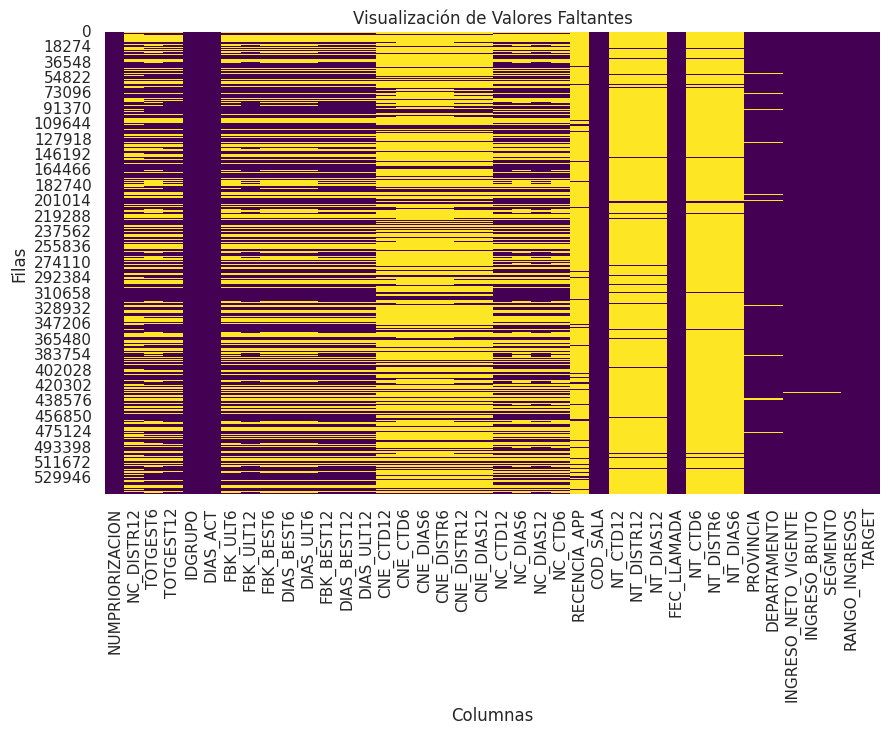

In [26]:
# Asegúrate de tener installed missingno y seaborn
!pip install missingno
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame booleano indicando valores faltantes
missing_data = df_dataMasterPrueba.isnull()

# Configuración del estilo y tamaño de la figura
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Usar un mapa de calor para visualizar los datos faltantes
sns.heatmap(missing_data, cmap="viridis", cbar=False)

# Añadir etiquetas y título
plt.title('Visualización de Valores Faltantes')
plt.xlabel('Columnas')
plt.ylabel('Filas')

# Mostrar el gráfico
plt.show()

**Eliminando las variables que tienen missing values >= 80%

In [27]:
df_dataMasterEntrenamiento.drop(columns=["NT_DIAS6", "NT_DISTR6", "NT_CTD6","NT_DIAS12", "NT_DISTR12", "NT_CTD12", "RECENCIA_APP"], axis=1, inplace=True)
#verificar NUMPRIORIZACION", "COD_SALA", "FEC_LLAMADA"], axis=1, inplace=True)
df_dataMasterEntrenamiento

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,FBK_ULT6,FBK_ULT12,FBK_BEST6,DIAS_BEST6,...,NC_CTD6,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,SEGMENTO,RANGO_INGRESOS,TARGET
0,1,0.333333,6.0,6.0,3,118,TLV,TLV,TLV,8.0,...,2.0,EC,2018-02-08,TACNA,TACNA,7136.0,9389.0,2,Entre S/.4000-10000,1
1,1,0.461538,13.0,13.0,40,94,TLV,TLV,TLV,46.0,...,6.0,PP,2017-10-18,LIMA,LIMA,6920.0,9105.0,1BC,Entre S/.4000-10000,1
2,1,0.666667,2.0,6.0,6,223,TLV,TLV,TLV,127.0,...,2.0,PA,2018-02-13,LIMA,LIMA,1473.0,1655.0,2,Entre S/.1000-4000,1
3,1,NaN,4.0,4.0,95,96,TLV,TLV,TLV,49.0,...,NaN,NC,2018-02-22,LIMA,LIMA,2293.0,2729.0,2,Entre S/.1000-4000,1
4,1,0.187500,10.0,16.0,4,91,TLV,TLV,TLV,27.0,...,2.0,EC,2017-11-07,CUSCO,CUSCO,6470.0,8513.0,3,Entre S/.4000-10000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2,1.000000,4.0,4.0,95,99,TLV,TLV,TLV,17.0,...,4.0,CD,2017-09-19,CORONEL PORTILLO,UCAYALI,3535.0,4474.0,3,Entre S/.4000-10000,0
757387,1,NaN,NaN,NaN,40,66,NaN,NaN,NaN,NaN,...,NaN,NC,2017-09-25,LIMA,LIMA,1320.0,1483.0,1A,Entre S/.1000-4000,0
757388,2,0.500000,2.0,2.0,40,169,TLV,TLV,TLV,169.0,...,1.0,NC,2017-09-25,LIMA,LIMA,1563.0,1756.0,2,Entre S/.1000-4000,0
757389,1,NaN,NaN,NaN,3,43,NaN,NaN,NaN,NaN,...,NaN,C,2017-09-27,LIMA,LIMA,1383.0,1553.0,2,Entre S/.1000-4000,0


In [28]:
#verificando eliminación de las variables con valores missing en porcentajes altos
df_dataMasterEntrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       757391 non-null  int64  
 1   NC_DISTR12            507452 non-null  float64
 2   TOTGEST6              565441 non-null  float64
 3   TOTGEST12             587885 non-null  float64
 4   IDGRUPO               757391 non-null  int64  
 5   DIAS_ACT              757391 non-null  int64  
 6   FBK_ULT6              565441 non-null  object 
 7   FBK_ULT12             587885 non-null  object 
 8   FBK_BEST6             565441 non-null  object 
 9   DIAS_BEST6            565441 non-null  float64
 10  DIAS_ULT6             565441 non-null  float64
 11  FBK_BEST12            587885 non-null  object 
 12  DIAS_BEST12           587885 non-null  float64
 13  DIAS_ULT12            587885 non-null  float64
 14  CNE_CTD12             302045 non-null  float64
 15  

In [29]:
df_dataMasterPrueba.drop(columns=["NT_DIAS6", "NT_DISTR6", "NT_CTD6","NT_DIAS12", "NT_DISTR12", "NT_CTD12", "RECENCIA_APP"], axis=1, inplace=True)
df_dataMasterPrueba

#verificar NUMPRIORIZACION", "COD_SALA", "FEC_LLAMADA"], axis=1, inplace=True)

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,FBK_ULT6,FBK_ULT12,FBK_BEST6,DIAS_BEST6,...,NC_CTD6,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,SEGMENTO,RANGO_INGRESOS,TARGET
0,1,0.5,NaN,2.0,4,85,NaN,TLV,NaN,NaN,...,NaN,EC,2017-12-04,CORONEL PORTILLO,UCAYALI,2664.0,3171.0,2,Entre S/.1000-4000,0
1,2,NaN,NaN,NaN,79,34,NaN,NaN,NaN,NaN,...,NaN,CON,2017-12-06,CORONEL PORTILLO,UCAYALI,2663.0,3170.0,2,Entre S/.1000-4000,0
2,1,NaN,NaN,NaN,95,62,NaN,NaN,NaN,NaN,...,NaN,CON,2017-12-26,CORONEL PORTILLO,UCAYALI,4421.0,5596.0,1BC,Entre S/.4000-10000,0
3,1,0.8,5.0,5.0,95,98,TLV,TLV,TLV,127.0,...,4.0,NC,2017-12-13,CORONEL PORTILLO,UCAYALI,2325.0,2767.0,3,Entre S/.1000-4000,0
4,1,0.4,5.0,5.0,4,8,TLV,TLV,TLV,50.0,...,2.0,C,2017-12-27,CORONEL PORTILLO,UCAYALI,1233.0,1385.0,2,Entre S/.1000-4000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1,NaN,NaN,NaN,30,1874,NaN,NaN,NaN,NaN,...,NaN,NC,2017-12-13,NaN,NaN,826.0,928.0,5,Entre S/.600-1000,0
548210,1,NaN,NaN,NaN,95,62,NaN,NaN,NaN,NaN,...,NaN,2DA,2017-12-13,AREQUIPA,AREQUIPA,4772.0,6040.0,1BC,Entre S/.4000-10000,0
548211,1,NaN,NaN,NaN,64,128,NaN,NaN,NaN,NaN,...,NaN,NC,2017-12-06,LIMA,LIMA,NaN,NaN,NaN,Sin ingresos,1
548212,2,NaN,NaN,NaN,40,507,NaN,NaN,NaN,NaN,...,NaN,NC,2017-12-15,LIMA,LIMA,2366.0,2816.0,3,Entre S/.1000-4000,0


In [30]:
#verificando eliminación de las variables con valores missing en porcentajes altos
df_dataMasterPrueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548214 entries, 0 to 548213
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       548214 non-null  int64  
 1   NC_DISTR12            297220 non-null  float64
 2   TOTGEST6              307847 non-null  float64
 3   TOTGEST12             336281 non-null  float64
 4   IDGRUPO               548214 non-null  int64  
 5   DIAS_ACT              548214 non-null  int64  
 6   FBK_ULT6              307847 non-null  object 
 7   FBK_ULT12             336281 non-null  object 
 8   FBK_BEST6             307847 non-null  object 
 9   DIAS_BEST6            307847 non-null  float64
 10  DIAS_ULT6             307847 non-null  float64
 11  FBK_BEST12            336281 non-null  object 
 12  DIAS_BEST12           336281 non-null  float64
 13  DIAS_ULT12            336281 non-null  float64
 14  CNE_CTD12             146645 non-null  float64
 15  

In [31]:
# Guardando el dataset Entrenamiento sin las primeras variables eliminadas.

#Exportando la data df_dataMasterEntrenamiento a un CSV file para ser reutilizado fácilmente
import os
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_dataMasterEntrenamiento.to_csv('df_dataMasterEntrenamientoSinPrimerosNulosEliminados.csv', index=False)

# Subir los archivos al Drive
#files.upload()



Ubicación actual de trabajo: /content


In [32]:
# Guardando el dataset Prueba sin las primeras variables eliminadas.
#Exportando la data df_dataMasterPrueba a un CSV file para ser reutilizado fácilmente
import os
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_dataMasterPrueba.to_csv('df_dataMasterPruebaSinPrimerosNulosEliminados.csv', index=False)

# Subir los archivos al Drive
#files.upload()



Ubicación actual de trabajo: /content


In [33]:
#Identificando las variables numéricas de la data "df_dataMasterEntrenamiento" - Data Entrenamiento
variables_numericas_df_dataMasterEntrenamiento = df_dataMasterEntrenamiento.select_dtypes(include=[np.number])

#Identificando las variables categóricas de la data "df_dataMasterEntrenamiento" - Data Entrenamiento
variables_categoricas_df_dataMasterEntrenamiento = df_dataMasterEntrenamiento.select_dtypes(include=['object'])

In [34]:
#Identificando las variables numéricas de la data "df_dataMasterPrueba" - Data Prueba
variables_numericas_df_dataMasterPrueba = df_dataMasterPrueba.select_dtypes(include=[np.number])

#Identificando las variables categóricas de la data "df_dataMasterPrueba" - Data Prueba
variables_categoricas_df_dataMasterPrueba = df_dataMasterPrueba.select_dtypes(include=['object'])

In [35]:
variables_numericas_df_dataMasterEntrenamiento

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,DIAS_BEST6,DIAS_ULT6,DIAS_BEST12,DIAS_ULT12,...,CNE_DISTR6,CNE_DISTR12,CNE_DIAS12,NC_CTD12,NC_DIAS6,NC_DIAS12,NC_CTD6,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,TARGET
0,1,0.333333,6.0,6.0,3,118,8.0,8.0,8.0,8.0,...,0.166667,0.166667,114.0,2.0,58.0,58.0,2.0,7136.0,9389.0,1
1,1,0.461538,13.0,13.0,40,94,46.0,9.0,46.0,9.0,...,0.307692,0.307692,15.0,6.0,9.0,9.0,6.0,6920.0,9105.0,1
2,1,0.666667,2.0,6.0,6,223,127.0,127.0,223.0,127.0,...,NaN,NaN,NaN,4.0,127.0,127.0,2.0,1473.0,1655.0,1
3,1,NaN,4.0,4.0,95,96,49.0,49.0,49.0,49.0,...,0.500000,0.500000,68.0,NaN,NaN,NaN,NaN,2293.0,2729.0,1
4,1,0.187500,10.0,16.0,4,91,27.0,27.0,27.0,27.0,...,0.100000,0.187500,119.0,3.0,140.0,140.0,2.0,6470.0,8513.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2,1.000000,4.0,4.0,95,99,17.0,17.0,17.0,17.0,...,NaN,NaN,NaN,4.0,17.0,17.0,4.0,3535.0,4474.0,0
757387,1,NaN,NaN,NaN,40,66,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1320.0,1483.0,0
757388,2,0.500000,2.0,2.0,40,169,169.0,23.0,169.0,23.0,...,NaN,NaN,NaN,1.0,23.0,23.0,1.0,1563.0,1756.0,0
757389,1,NaN,NaN,NaN,3,43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1383.0,1553.0,0


In [36]:
variables_numericas_df_dataMasterPrueba

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,DIAS_BEST6,DIAS_ULT6,DIAS_BEST12,DIAS_ULT12,...,CNE_DISTR6,CNE_DISTR12,CNE_DIAS12,NC_CTD12,NC_DIAS6,NC_DIAS12,NC_CTD6,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,TARGET
0,1,0.5,NaN,2.0,4,85,NaN,NaN,289.0,276.0,...,NaN,NaN,NaN,1.0,NaN,276.0,NaN,2664.0,3171.0,0
1,2,NaN,NaN,NaN,79,34,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2663.0,3170.0,0
2,1,NaN,NaN,NaN,95,62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4421.0,5596.0,0
3,1,0.8,5.0,5.0,95,98,127.0,17.0,127.0,17.0,...,0.2,0.2,127.0,4.0,17.0,17.0,4.0,2325.0,2767.0,0
4,1,0.4,5.0,5.0,4,8,50.0,49.0,50.0,49.0,...,0.6,0.6,50.0,2.0,49.0,49.0,2.0,1233.0,1385.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1,NaN,NaN,NaN,30,1874,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,826.0,928.0,0
548210,1,NaN,NaN,NaN,95,62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4772.0,6040.0,0
548211,1,NaN,NaN,NaN,64,128,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
548212,2,NaN,NaN,NaN,40,507,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2366.0,2816.0,0


In [40]:
#Identificando las variables numéricas de la data "df_dataMasterEntrenamiento" - Data Entrenamiento
#df_dataMasterEntrenamiento.select_dtypes(include=[np.number])

In [41]:
#Identificando las variables categóricas de la data "df_dataMasterEntrenamiento" - Data Entrenamiento
#df_dataMasterEntrenamiento.select_dtypes(include=['object'])

In [42]:
#identificando las variables numéricas de la data "df_dataMasterPrueba" - Data Prueba
#df_dataMasterPrueba.select_dtypes(include=[np.number])

In [43]:
#Identificando las variables categóricas de la data "df_dataPrueba" - Data Prueba
#f_dataMasterPrueba.select_dtypes(include=['object'])

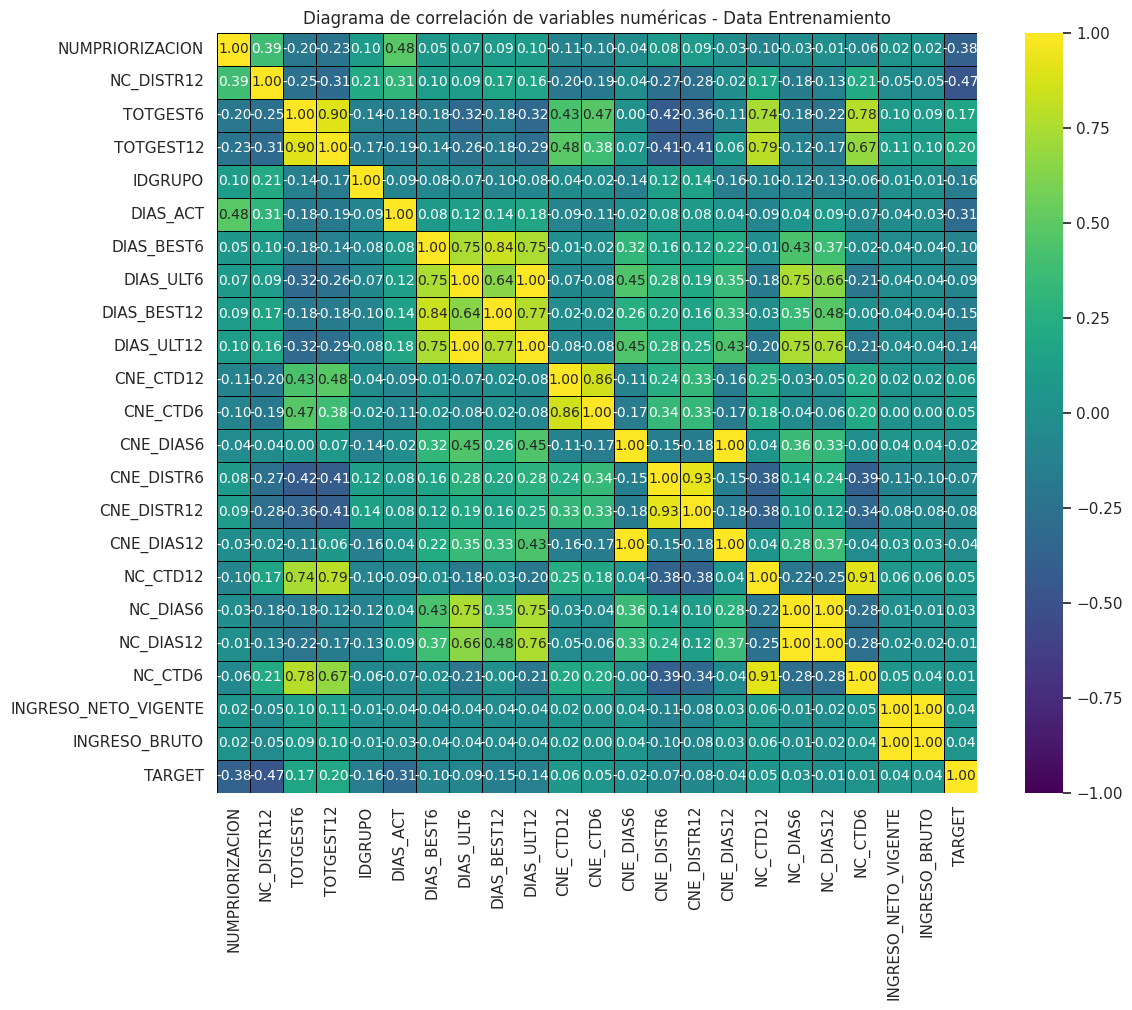

In [37]:
#Mostrando la correlación de variables para el dataset Entrenamiento
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
diagrama_correlación_Data_Entrenamiento = variables_numericas_df_dataMasterEntrenamiento.corr()

# Crear una figura y un eje (subplot)
plt.figure(figsize=(12, 10))

# Dibujar el mapa de calor con seaborn
sns.heatmap(diagrama_correlación_Data_Entrenamiento,
            annot=True,       # Mostrar los valores dentro de cada celda
            cmap="viridis",  # Utilizar el mapa de colores "coolwarm"
            fmt=".2f",        # Formato de los valores
            vmin=-1,          # Valor mínimo del mapa de colores
            vmax=1,           # Valor máximo del mapa de colores
            linewidths=0.5,   # Grosor de las líneas entre celdas
            linecolor="black", # Color de las líneas entre celdas
            cbar=True,       # Mostrar la barra de color
            square=True,     # Hacer que las celdas sean cuadradas
            annot_kws={"size": 10})  # Tamaño del texto de los valores

# Título del gráfico
plt.title("Diagrama de correlación de variables numéricas - Data Entrenamiento")

# Añadir un ajuste para evitar que se corte el último trozo del heatmap
plt.tight_layout()

# Mostrar el gráfico
plt.show()

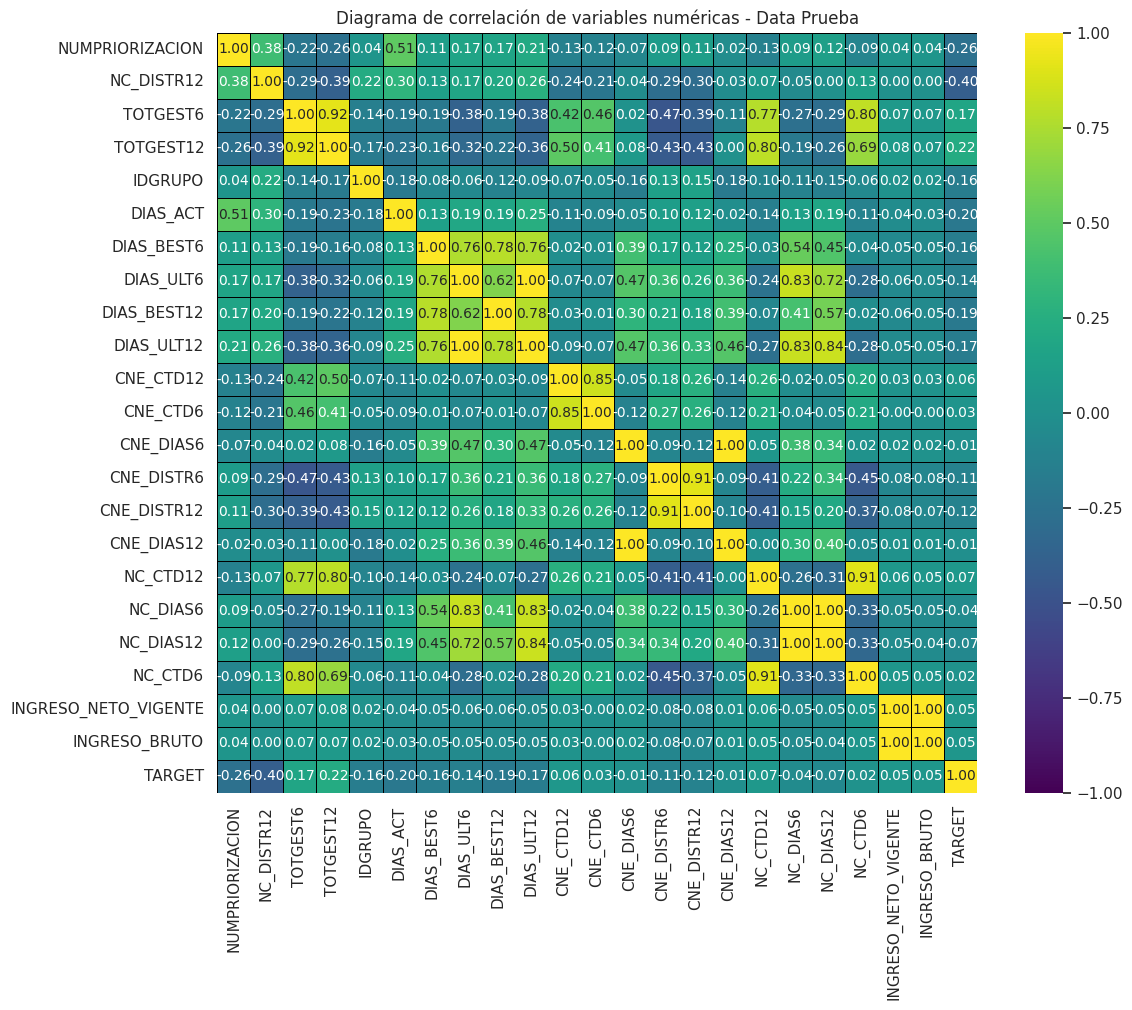

In [38]:
#Mostrando la correlación de variables para el dataset Prueba
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
diagrama_correlación_Data_Prueba = variables_numericas_df_dataMasterPrueba.corr()

# Crear una figura y un eje (subplot)
plt.figure(figsize=(12, 10))

# Dibujar el mapa de calor con seaborn
sns.heatmap(diagrama_correlación_Data_Prueba,
            annot=True,       # Mostrar los valores dentro de cada celda
            cmap="viridis",  # Utilizar el mapa de colores "coolwarm"
            fmt=".2f",        # Formato de los valores
            vmin=-1,          # Valor mínimo del mapa de colores
            vmax=1,           # Valor máximo del mapa de colores
            linewidths=0.5,   # Grosor de las líneas entre celdas
            linecolor="black", # Color de las líneas entre celdas
            cbar=True,       # Mostrar la barra de color
            square=True,     # Hacer que las celdas sean cuadradas
            annot_kws={"size": 10})  # Tamaño del texto de los valores

# Título del gráfico
plt.title("Diagrama de correlación de variables numéricas - Data Prueba")

# Añadir un ajuste para evitar que se corte el último trozo del heatmap
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [39]:
#Dataset Entrenamiento
import numpy as np

# Se calcula la matriz de correlación
matriz_correlacion = variables_numericas_df_dataMasterEntrenamiento.corr()

# Se crea una máscara triangular superior para ignorar la mitad inferior de la matriz de correlación
mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)

# Se inicializa un conjunto para almacenar las columnas a excluir
variables_to_drop_1 = set()

# Se itera sobre las columnas de la matriz de correlación
for var in matriz_correlacion.columns:

    # Si la columna ya está marcada para ser excluida, se omite
    if var in variables_to_drop_1:
        continue

    # Se identifican las columnas con correlación mayor al 70% con la columna actual
    variables_alta_correlacion_1 = matriz_correlacion.index[matriz_correlacion[var].abs() > 0.70].tolist()

    # Se remueve la columna actual de la lista de alta correlación para evitar la redundancia
    variables_alta_correlacion_1.remove(var)

    # Se agregan las columnas de alta correlación al conjunto de columnas a excluir
    variables_to_drop_1.update(variables_alta_correlacion_1)

# Se excluyen las columnas identificadas
dataset_Entrenamiento_disminuida = variables_numericas_df_dataMasterEntrenamiento.drop(columns=variables_to_drop_1)

# Se imprime el conjunto de columnas excluidas
print("variables disminuídas:", variables_to_drop_1)

variables disminuídas: {'DIAS_ULT6', 'NC_CTD12', 'NC_DIAS12', 'NC_CTD6', 'TOTGEST12', 'INGRESO_BRUTO', 'CNE_DIAS12', 'CNE_CTD6', 'DIAS_ULT12', 'DIAS_BEST12', 'CNE_DISTR12'}


In [40]:
#Dataset Prueba
import numpy as np

# Se calcula la matriz de correlación
matriz_correlacion = variables_numericas_df_dataMasterPrueba.corr()

# Se crea una máscara triangular superior para ignorar la mitad inferior de la matriz de correlación
mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)

# Se inicializa un conjunto para almacenar las columnas a excluir
variables_to_drop_2 = set()

# Se itera sobre las columnas de la matriz de correlación
for var in matriz_correlacion.columns:

    # Si la columna ya está marcada para ser excluida, se omite
    if var in variables_to_drop_2:
        continue

    # Se identifican las columnas con correlación mayor al 70% con la columna actual
    variables_alta_correlacion_2 = matriz_correlacion.index[matriz_correlacion[var].abs() > 0.70].tolist()

    # Se remueve la columna actual de la lista de alta correlación para evitar la redundancia
    variables_alta_correlacion_2.remove(var)

    # Se agregan las columnas de alta correlación al conjunto de columnas a excluir
    variables_to_drop_2.update(variables_alta_correlacion_2)

# Se excluyen las columnas identificadas
dataset_Prueba_disminuida = variables_numericas_df_dataMasterPrueba.drop(columns=variables_to_drop_2)

# Se imprime el conjunto de columnas excluidas
print("variables disminuídas:", variables_to_drop_2)

variables disminuídas: {'DIAS_ULT6', 'NC_CTD12', 'NC_DIAS12', 'NC_CTD6', 'TOTGEST12', 'INGRESO_BRUTO', 'CNE_DIAS12', 'CNE_CTD6', 'DIAS_ULT12', 'DIAS_BEST12', 'CNE_DISTR12'}


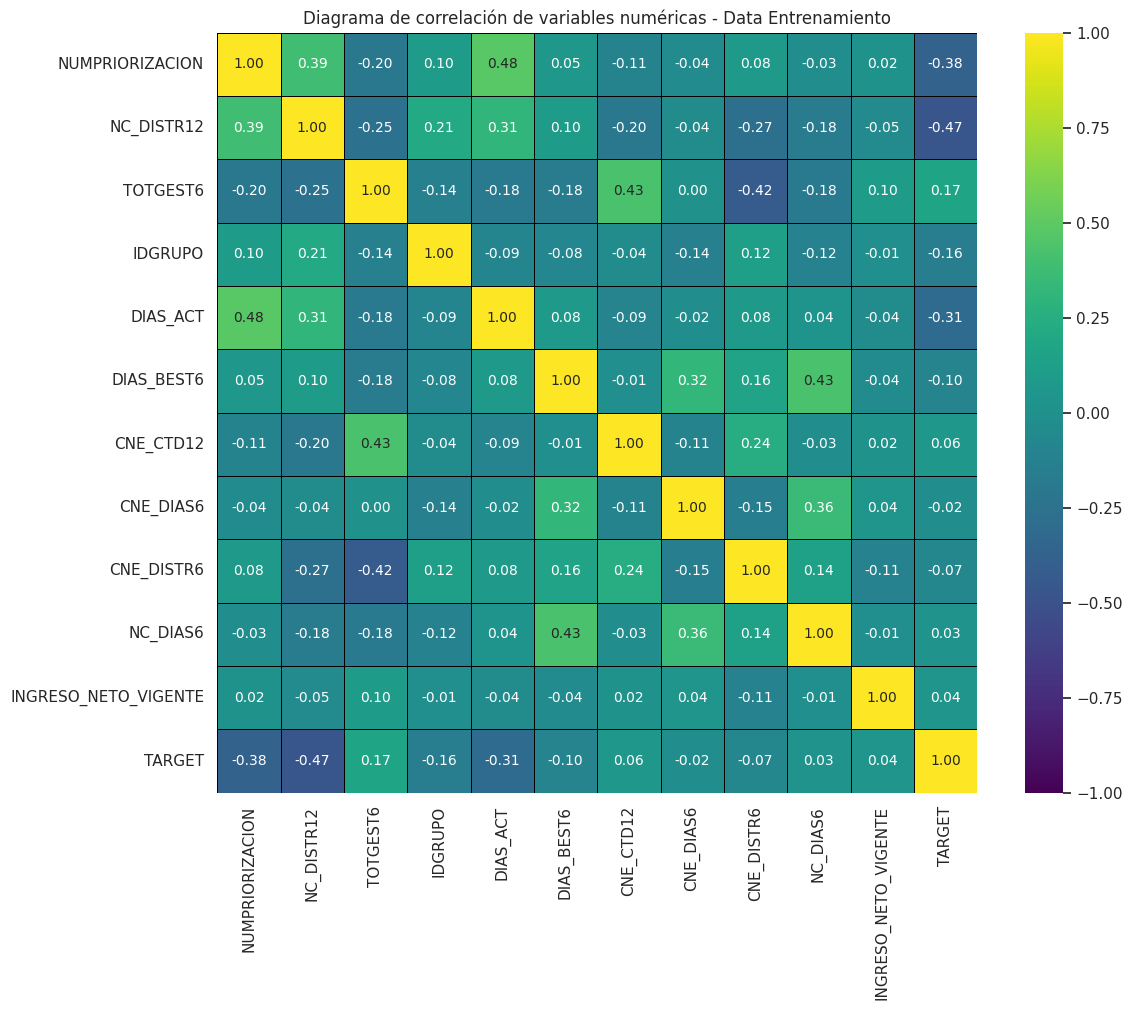

In [41]:
#Mostrando la correlación de variables disminuídas para el dataset Entrenamiento
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
diagrama_correlacion_Data_Entrenamiento = dataset_Entrenamiento_disminuida.corr()

# Crear una figura y un eje (subplot)
plt.figure(figsize=(12, 10))

# Dibujar el mapa de calor con seaborn
sns.heatmap(diagrama_correlacion_Data_Entrenamiento,
            annot=True,       # Mostrar los valores dentro de cada celda
            cmap="viridis",  # Utilizar el mapa de colores "coolwarm"
            fmt=".2f",        # Formato de los valores
            vmin=-1,          # Valor mínimo del mapa de colores
            vmax=1,           # Valor máximo del mapa de colores
            linewidths=0.5,   # Grosor de las líneas entre celdas
            linecolor="black", # Color de las líneas entre celdas
            cbar=True,       # Mostrar la barra de color
            square=True,     # Hacer que las celdas sean cuadradas
            annot_kws={"size": 10})  # Tamaño del texto de los valores

# Título del gráfico
plt.title("Diagrama de correlación de variables numéricas - Data Entrenamiento")

# Añadir un ajuste para evitar que se corte el último trozo del heatmap
plt.tight_layout()

# Mostrar el gráfico
plt.show()

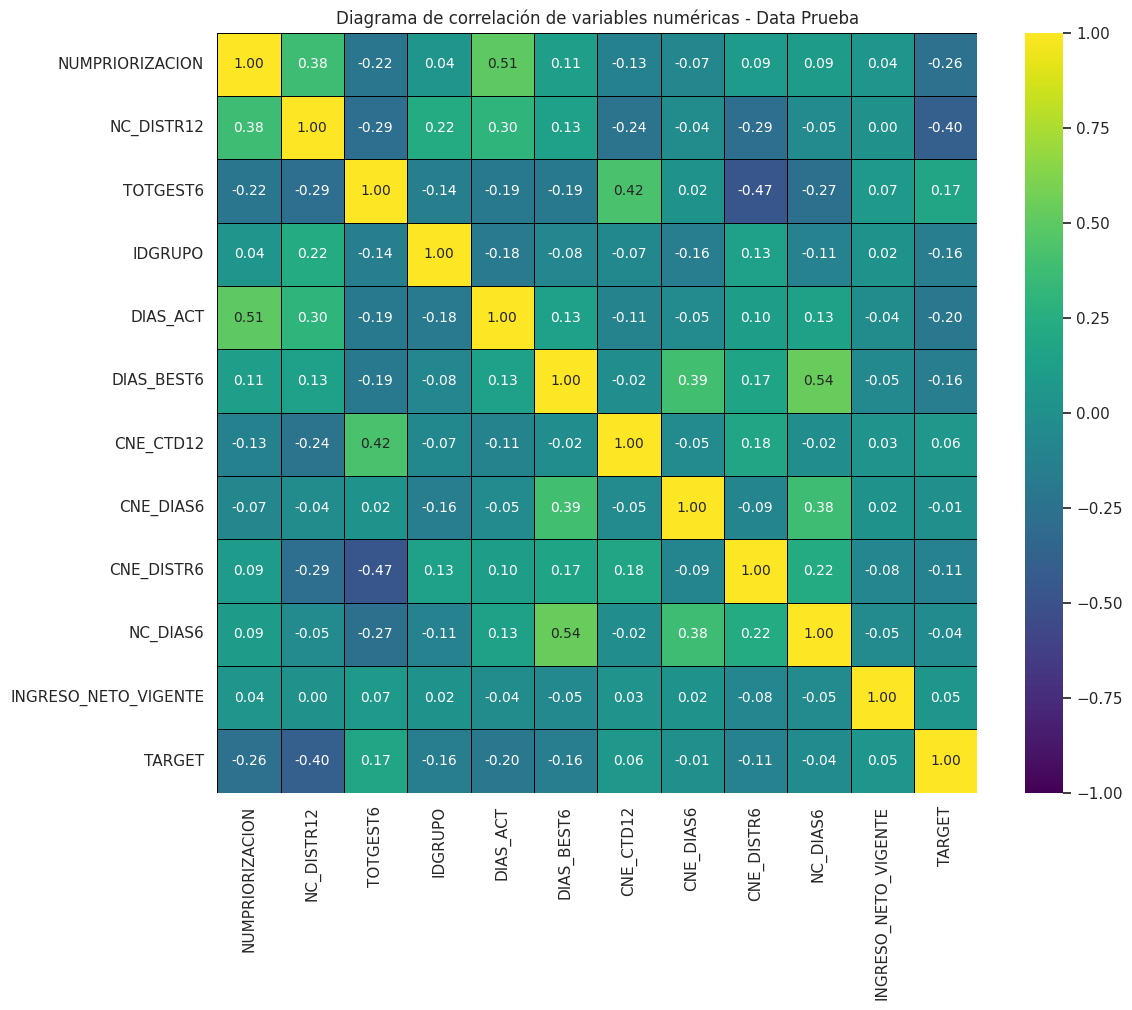

In [42]:
#Mostrando la correlación de variables disminuídas para el dataset Prueba
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
diagrama_correlacion_Data_Prueba = dataset_Prueba_disminuida.corr()

# Crear una figura y un eje (subplot)
plt.figure(figsize=(12, 10))

# Dibujar el mapa de calor con seaborn
sns.heatmap(diagrama_correlacion_Data_Prueba,
            annot=True,       # Mostrar los valores dentro de cada celda
            cmap="viridis",  # Utilizar el mapa de colores "coolwarm"
            fmt=".2f",        # Formato de los valores
            vmin=-1,          # Valor mínimo del mapa de colores
            vmax=1,           # Valor máximo del mapa de colores
            linewidths=0.5,   # Grosor de las líneas entre celdas
            linecolor="black", # Color de las líneas entre celdas
            cbar=True,       # Mostrar la barra de color
            square=True,     # Hacer que las celdas sean cuadradas
            annot_kws={"size": 10})  # Tamaño del texto de los valores

# Título del gráfico
plt.title("Diagrama de correlación de variables numéricas - Data Prueba")

# Añadir un ajuste para evitar que se corte el último trozo del heatmap
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [43]:
#Excluyendo las variables que resultaron en correlación alta
#Dataset Entrenamiento
variables_numericas_df_dataMasterEntrenamiento = variables_numericas_df_dataMasterEntrenamiento.drop(columns=variables_to_drop_1)

#Dataset Prueba
variables_numericas_df_dataMasterPrueba = variables_numericas_df_dataMasterPrueba.drop(columns=variables_to_drop_2)

In [44]:
variables_numericas_df_dataMasterEntrenamiento

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,IDGRUPO,DIAS_ACT,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,NC_DIAS6,INGRESO_NETO_VIGENTE,TARGET
0,1,0.333333,6.0,3,118,8.0,1.0,114.0,0.166667,58.0,7136.0,1
1,1,0.461538,13.0,40,94,46.0,4.0,15.0,0.307692,9.0,6920.0,1
2,1,0.666667,2.0,6,223,127.0,NaN,NaN,NaN,127.0,1473.0,1
3,1,NaN,4.0,95,96,49.0,2.0,68.0,0.500000,NaN,2293.0,1
4,1,0.187500,10.0,4,91,27.0,3.0,119.0,0.100000,140.0,6470.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2,1.000000,4.0,95,99,17.0,NaN,NaN,NaN,17.0,3535.0,0
757387,1,NaN,NaN,40,66,NaN,NaN,NaN,NaN,NaN,1320.0,0
757388,2,0.500000,2.0,40,169,169.0,NaN,NaN,NaN,23.0,1563.0,0
757389,1,NaN,NaN,3,43,NaN,NaN,NaN,NaN,NaN,1383.0,0


In [45]:
variables_numericas_df_dataMasterEntrenamiento.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       757391 non-null  int64  
 1   NC_DISTR12            507452 non-null  float64
 2   TOTGEST6              565441 non-null  float64
 3   IDGRUPO               757391 non-null  int64  
 4   DIAS_ACT              757391 non-null  int64  
 5   DIAS_BEST6            565441 non-null  float64
 6   CNE_CTD12             302045 non-null  float64
 7   CNE_DIAS6             260602 non-null  float64
 8   CNE_DISTR6            260602 non-null  float64
 9   NC_DIAS6              474176 non-null  float64
 10  INGRESO_NETO_VIGENTE  756031 non-null  float64
 11  TARGET                757391 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 69.3 MB


In [46]:
variables_numericas_df_dataMasterPrueba

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,IDGRUPO,DIAS_ACT,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,NC_DIAS6,INGRESO_NETO_VIGENTE,TARGET
0,1,0.5,NaN,4,85,NaN,NaN,NaN,NaN,NaN,2664.0,0
1,2,NaN,NaN,79,34,NaN,NaN,NaN,NaN,NaN,2663.0,0
2,1,NaN,NaN,95,62,NaN,NaN,NaN,NaN,NaN,4421.0,0
3,1,0.8,5.0,95,98,127.0,1.0,127.0,0.2,17.0,2325.0,0
4,1,0.4,5.0,4,8,50.0,3.0,50.0,0.6,49.0,1233.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1,NaN,NaN,30,1874,NaN,NaN,NaN,NaN,NaN,826.0,0
548210,1,NaN,NaN,95,62,NaN,NaN,NaN,NaN,NaN,4772.0,0
548211,1,NaN,NaN,64,128,NaN,NaN,NaN,NaN,NaN,NaN,1
548212,2,NaN,NaN,40,507,NaN,NaN,NaN,NaN,NaN,2366.0,0


In [47]:
variables_numericas_df_dataMasterPrueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548214 entries, 0 to 548213
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       548214 non-null  int64  
 1   NC_DISTR12            297220 non-null  float64
 2   TOTGEST6              307847 non-null  float64
 3   IDGRUPO               548214 non-null  int64  
 4   DIAS_ACT              548214 non-null  int64  
 5   DIAS_BEST6            307847 non-null  float64
 6   CNE_CTD12             146645 non-null  float64
 7   CNE_DIAS6             120479 non-null  float64
 8   CNE_DISTR6            120479 non-null  float64
 9   NC_DIAS6              264652 non-null  float64
 10  INGRESO_NETO_VIGENTE  545863 non-null  float64
 11  TARGET                548214 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 50.2 MB


###Imputación de datos

In [48]:
#Creamos una copia de las variables numéricas
df_variables_numericas_Entrenamiento = variables_numericas_df_dataMasterEntrenamiento.copy()
df_variables_numericas_Prueba = variables_numericas_df_dataMasterPrueba.copy()


In [49]:
df_variables_numericas_Entrenamiento

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,IDGRUPO,DIAS_ACT,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,NC_DIAS6,INGRESO_NETO_VIGENTE,TARGET
0,1,0.333333,6.0,3,118,8.0,1.0,114.0,0.166667,58.0,7136.0,1
1,1,0.461538,13.0,40,94,46.0,4.0,15.0,0.307692,9.0,6920.0,1
2,1,0.666667,2.0,6,223,127.0,NaN,NaN,NaN,127.0,1473.0,1
3,1,NaN,4.0,95,96,49.0,2.0,68.0,0.500000,NaN,2293.0,1
4,1,0.187500,10.0,4,91,27.0,3.0,119.0,0.100000,140.0,6470.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2,1.000000,4.0,95,99,17.0,NaN,NaN,NaN,17.0,3535.0,0
757387,1,NaN,NaN,40,66,NaN,NaN,NaN,NaN,NaN,1320.0,0
757388,2,0.500000,2.0,40,169,169.0,NaN,NaN,NaN,23.0,1563.0,0
757389,1,NaN,NaN,3,43,NaN,NaN,NaN,NaN,NaN,1383.0,0


In [50]:
#Mostrando detalles de la Data Entrenamiento (df_variables_numericas_Entrenamiento)
dataEntrenamiento_numerica = df_variables_numericas_Entrenamiento.isnull().sum().sort_values(ascending=False)
print(dataEntrenamiento_numerica)
#Se visualiza que hay problemas con los Nulos, tan solo las siguientes variables están completas
#NUMPRIORIZACION              0
#IDGRUPO                      0
#DIAS_ACT                     0
#TARGET                       0


####################AQUÍ

CNE_DIAS6               496789
CNE_DISTR6              496789
CNE_CTD12               455346
NC_DIAS6                283215
NC_DISTR12              249939
TOTGEST6                191950
DIAS_BEST6              191950
INGRESO_NETO_VIGENTE      1360
NUMPRIORIZACION              0
IDGRUPO                      0
DIAS_ACT                     0
TARGET                       0
dtype: int64


In [51]:
df_variables_numericas_Prueba

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,IDGRUPO,DIAS_ACT,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,NC_DIAS6,INGRESO_NETO_VIGENTE,TARGET
0,1,0.5,NaN,4,85,NaN,NaN,NaN,NaN,NaN,2664.0,0
1,2,NaN,NaN,79,34,NaN,NaN,NaN,NaN,NaN,2663.0,0
2,1,NaN,NaN,95,62,NaN,NaN,NaN,NaN,NaN,4421.0,0
3,1,0.8,5.0,95,98,127.0,1.0,127.0,0.2,17.0,2325.0,0
4,1,0.4,5.0,4,8,50.0,3.0,50.0,0.6,49.0,1233.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1,NaN,NaN,30,1874,NaN,NaN,NaN,NaN,NaN,826.0,0
548210,1,NaN,NaN,95,62,NaN,NaN,NaN,NaN,NaN,4772.0,0
548211,1,NaN,NaN,64,128,NaN,NaN,NaN,NaN,NaN,NaN,1
548212,2,NaN,NaN,40,507,NaN,NaN,NaN,NaN,NaN,2366.0,0


In [52]:
#Mostrando detalles de la Data Prueba (df_variables_numericas_Prueba)
dataPrueba_numerica = df_variables_numericas_Prueba.isnull().sum().sort_values(ascending=False)
print(dataPrueba_numerica)
#Se visualiza que hay problemas con los Nulos, tan solo las siguientes variables están completas
#NUMPRIORIZACION              0
#IDGRUPO                      0
#DIAS_ACT                     0
#TARGET                       0


####################AQUÍ

CNE_DIAS6               427735
CNE_DISTR6              427735
CNE_CTD12               401569
NC_DIAS6                283562
NC_DISTR12              250994
TOTGEST6                240367
DIAS_BEST6              240367
INGRESO_NETO_VIGENTE      2351
NUMPRIORIZACION              0
IDGRUPO                      0
DIAS_ACT                     0
TARGET                       0
dtype: int64


In [56]:
#Guardar toda la sesión
#!pip install dill

In [62]:
#import dill
#dill.dump_session('tarea_mlsa.db') #guarda el ambiente de trabajo.

In [ ]:
#!pip install dill

In [55]:
#import dill
# Cargando el estado completo de una sesión de Python
#dill.load_session('tarea_mlsa.db')

In [53]:
#Separamos las variables que no tienen valores NULOS en los datasets obtenidos
columnas_numericas_entrenamiento_para_imputar = df_variables_numericas_Entrenamiento.drop(['NUMPRIORIZACION', 'IDGRUPO', 'DIAS_ACT', 'TARGET'], axis=1)
columnas_numericas_prueba_para_imputar = df_variables_numericas_Prueba.drop(['NUMPRIORIZACION', 'IDGRUPO', 'DIAS_ACT', 'TARGET'], axis=1)

In [54]:
#obteniendo este set de datos para realizar la concatenación más abajo antes del tratamiento de outliers
num_train_sin_nulos = df_variables_numericas_Entrenamiento.drop(['NC_DISTR12', 'TOTGEST6','DIAS_BEST6','CNE_CTD12','CNE_DIAS6','CNE_DISTR6', 'NC_DIAS6', 'INGRESO_NETO_VIGENTE'], axis=1)

In [55]:
num_train_sin_nulos

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET
0,1,3,118,1
1,1,40,94,1
2,1,6,223,1
3,1,95,96,1
4,1,4,91,1
...,...,...,...,...
757386,2,95,99,0
757387,1,40,66,0
757388,2,40,169,0
757389,1,3,43,0


In [56]:
#obteniendo este set de datos para realizar la concatenación más abajo antes del tratamiento de outliers
num_test_sin_nulos = df_variables_numericas_Prueba.drop(['NC_DISTR12', 'TOTGEST6','DIAS_BEST6','CNE_CTD12','CNE_DIAS6','CNE_DISTR6', 'NC_DIAS6', 'INGRESO_NETO_VIGENTE'], axis=1)

In [57]:
num_test_sin_nulos

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET
0,1,4,85,0
1,2,79,34,0
2,1,95,62,0
3,1,95,98,0
4,1,4,8,0
...,...,...,...,...
548209,1,30,1874,0
548210,1,95,62,0
548211,1,64,128,1
548212,2,40,507,0


##Variables Numéricas - Data Entrenamiento

In [58]:
#imputación por el promedio
#Creando la función
def imputar_media(df):
  for columna in df.columns:
      if df[columna].dtype == 'float64':
          df[columna].fillna(df[columna].mean(), inplace=True)
  return df

# Imputamos
num_train_imp_media = columnas_numericas_entrenamiento_para_imputar.copy()
imputar_media(num_train_imp_media)
print(f"Cantidad de nulos de Entrenamiento es: {num_train_imp_media.isnull().sum().sum()}")

Cantidad de nulos de Entrenamiento es: 0


In [59]:
num_train_imp_media

,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,NC_DIAS6,INGRESO_NETO_VIGENTE
0,0.333333,6.000000,8.000000,1.000000,114.000000,0.166667,58.000000,7136.0
1,0.461538,13.000000,46.000000,4.000000,15.000000,0.307692,9.000000,6920.0
2,0.666667,2.000000,127.000000,2.655829,78.890254,0.270095,127.000000,1473.0
3,0.549908,4.000000,49.000000,2.000000,68.000000,0.500000,52.804809,2293.0
4,0.187500,10.000000,27.000000,3.000000,119.000000,0.100000,140.000000,6470.0
...,...,...,...,...,...,...,...,...
757386,1.000000,4.000000,17.000000,2.655829,78.890254,0.270095,17.000000,3535.0
757387,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,52.804809,1320.0
757388,0.500000,2.000000,169.000000,2.655829,78.890254,0.270095,23.000000,1563.0
757389,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,52.804809,1383.0


In [60]:
# Imputación por la media truncada
# Creando la función
def imputar_media_truncada(df, proportiontocut=0.1):
    for columna in df.columns:
        if df[columna].dtype == 'float64':
            media_truncada = trim_mean(df[columna].dropna(), proportiontocut=proportiontocut)
            df[columna].fillna(media_truncada, inplace=True)
    return df

# Imputamos
num_train_imp_media_truncada = columnas_numericas_entrenamiento_para_imputar.copy()
imputar_media_truncada(num_train_imp_media_truncada)
print(f"Cantidad de nulos de Entrenamiento es: {num_train_imp_media_truncada.isnull().sum().sum()}")

Cantidad de nulos de Entrenamiento es: 0


In [61]:
# Imputación por la mediana

# Creando la función
def imputar_mediana(df):
  for columna in df.columns:
      if df[columna].dtype == 'float64':
          df[columna].fillna(df[columna].median(), inplace=True)
  return df

# Imputamos
num_train_imp_mediana = columnas_numericas_entrenamiento_para_imputar.copy()
imputar_mediana(num_train_imp_mediana)
print(f"Cantidad de nulos de Entrenamiento es: {num_train_imp_mediana.isnull().sum().sum()}")

Cantidad de nulos de Entrenamiento es: 0


In [62]:
num_train_imp_mediana

,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,NC_DIAS6,INGRESO_NETO_VIGENTE
0,0.333333,6.0,8.0,1.0,114.0,0.166667,58.0,7136.0
1,0.461538,13.0,46.0,4.0,15.0,0.307692,9.0,6920.0
2,0.666667,2.0,127.0,2.0,68.0,0.214286,127.0,1473.0
3,0.500000,4.0,49.0,2.0,68.0,0.500000,35.0,2293.0
4,0.187500,10.0,27.0,3.0,119.0,0.100000,140.0,6470.0
...,...,...,...,...,...,...,...,...
757386,1.000000,4.0,17.0,2.0,68.0,0.214286,17.0,3535.0
757387,0.500000,6.0,40.0,2.0,68.0,0.214286,35.0,1320.0
757388,0.500000,2.0,169.0,2.0,68.0,0.214286,23.0,1563.0
757389,0.500000,6.0,40.0,2.0,68.0,0.214286,35.0,1383.0


In [ ]:
# Imputacion por KNN
'''
# Ajustar la configuración de error de numpy
np.seterr(under='ignore')

# Creamos la función
def imputar_knn(df):
    # Escalar los datos
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df)

    # Imputar los valores con KNN
    knn_imputer = KNNImputer(n_neighbors=2)
    df_imp_knn = knn_imputer.fit_transform(df_scaled)

    # Revertir el escalado
    df_imp_knn = scaler.inverse_transform(df_imp_knn)
    df_imp_knn = pd.DataFrame(df_imp_knn, columns=df.columns)
    return df_imp_knn

# Imputamos
data_train_imp_knn = columnas_numericas_entrenamiento_para_imputar.copy()
num_train_imp_knn = imputar_knn(data_train_imp_knn)
print(f"Cantidad de nulos de Entrenamiento es: {num_train_imp_knn.isnull().sum().sum()}")
'''

##Variables Categóricas - Data Entrenamiento

In [63]:
# Imputación con la MODA
# Creando la función
def imputar_moda(df):
  for columna in df.columns:
    if df[columna].dtype == 'object':
        moda = df[columna].mode()[0]
        df[columna].fillna(moda, inplace=True)
  return df

# Imputamos
cat_train_imp_moda = variables_categoricas_df_dataMasterEntrenamiento.copy()
imputar_moda(cat_train_imp_moda)
print(f"Cantidad de nulos de Train es: {cat_train_imp_moda.isnull().sum().sum()}")

Cantidad de nulos de Train es: 0


In [64]:
cat_train_imp_moda

,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,TLV,TLV,TLV,TLV,EC,2018-02-08,TACNA,TACNA,2,Entre S/.4000-10000
1,TLV,TLV,TLV,TLV,PP,2017-10-18,LIMA,LIMA,1BC,Entre S/.4000-10000
2,TLV,TLV,TLV,TLV,PA,2018-02-13,LIMA,LIMA,2,Entre S/.1000-4000
3,TLV,TLV,TLV,TLV,NC,2018-02-22,LIMA,LIMA,2,Entre S/.1000-4000
4,TLV,TLV,TLV,TLV,EC,2017-11-07,CUSCO,CUSCO,3,Entre S/.4000-10000
...,...,...,...,...,...,...,...,...,...,...
757386,TLV,TLV,TLV,TLV,CD,2017-09-19,CORONEL PORTILLO,UCAYALI,3,Entre S/.4000-10000
757387,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,1A,Entre S/.1000-4000
757388,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,2,Entre S/.1000-4000
757389,TLV,TLV,TLV,TLV,C,2017-09-27,LIMA,LIMA,2,Entre S/.1000-4000


##Variables Numéricas - Data Prueba

In [65]:
#imputación por el promedio
#Creando la función
def imputar_media_p(df):
  for columna in df.columns:
      if df[columna].dtype == 'float64':
          df[columna].fillna(df[columna].mean(), inplace=True)
  return df

# Imputamos
num_test_imp_media = columnas_numericas_prueba_para_imputar.copy()
imputar_media_p(num_test_imp_media)
print(f"Cantidad de nulos de Prueba es: {num_test_imp_media.isnull().sum().sum()}")

Cantidad de nulos de Prueba es: 0


In [66]:
# Imputación por la media truncada
# Creando la función
def imputar_media_truncada_p(df, proportiontocut=0.1):
    for columna in df.columns:
        if df[columna].dtype == 'float64':
            media_truncada = trim_mean(df[columna].dropna(), proportiontocut=proportiontocut)
            df[columna].fillna(media_truncada, inplace=True)
    return df

# Imputamos
num_test_imp_media_truncada = columnas_numericas_prueba_para_imputar.copy()
imputar_media_truncada_p(num_test_imp_media_truncada)
print(f"Cantidad de nulos de Prueba es: {num_test_imp_media_truncada.isnull().sum().sum()}")

Cantidad de nulos de Prueba es: 0


In [67]:
# Imputación por la mediana

# Creando la función
def imputar_mediana_p(df):
  for columna in df.columns:
      if df[columna].dtype == 'float64':
          df[columna].fillna(df[columna].median(), inplace=True)
  return df

# Imputamos
num_test_imp_mediana = columnas_numericas_prueba_para_imputar.copy()
imputar_mediana_p(num_test_imp_mediana)
print(f"Cantidad de nulos de Prueba es: {num_test_imp_mediana.isnull().sum().sum()}")

Cantidad de nulos de Prueba es: 0


In [ ]:
# Imputacion por KNN
'''
# Ajustar la configuración de error de numpy
np.seterr(under='ignore')

# Creamos la función
def imputar_knn_p(df):
    # Escalar los datos
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df)

    # Imputar los valores con KNN
    knn_imputer = KNNImputer(n_neighbors=2)
    df_imp_knn = knn_imputer_p.fit_transform(df_scaled)

    # Revertir el escalado
    df_imp_knn = scaler.inverse_transform(df_imp_knn)
    df_imp_knn = pd.DataFrame(df_imp_knn, columns=df.columns)
    return df_imp_knn

# Imputamos
data_test_imp_knn = columnas_numericas_prueba_para_imputar.copy()
num_test_imp_knn = imputar_knn_p(data_test_imp_knn)
print(f"Cantidad de nulos de Prueba es: {num_test_imp_knn.isnull().sum().sum()}")
'''

##Variables Categóricas - Data Prueba

In [68]:
# Imputación con la MODA
# Creando la función
def imputar_moda_p(df):
  for columna in df.columns:
    if df[columna].dtype == 'object':
        moda = df[columna].mode()[0]
        df[columna].fillna(moda, inplace=True)
  return df

# Imputamos
cat_test_imp_moda = variables_categoricas_df_dataMasterPrueba.copy()
imputar_moda_p(cat_test_imp_moda)
print(f"Cantidad de nulos de Prueba es: {cat_test_imp_moda.isnull().sum().sum()}")

Cantidad de nulos de Prueba es: 0


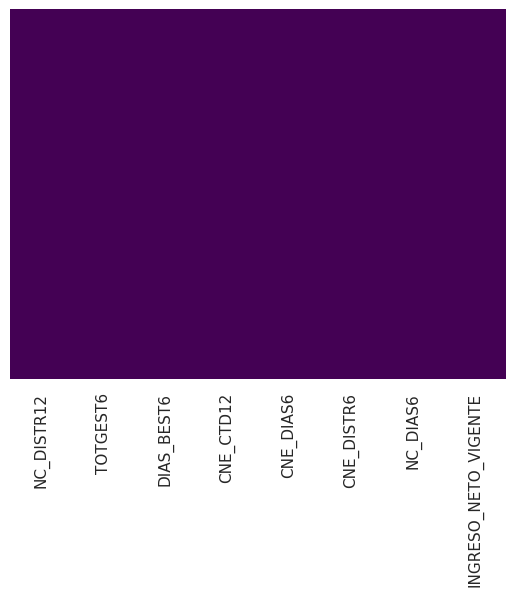

In [69]:
#Graficando los valores Nulos de dataEntrenamiento (num_train_imp_media) por variable sobre la data Entrenamiento luego de la imputación inicial con media y moda
sns.heatmap(num_train_imp_media.isnull(),yticklabels=False,cbar=False,cmap='viridis');
#No muestra nulos

In [70]:
#Consolidando en un solo dataset tanto Data de Entrenamiento como la Data de Test
#Considerando tan solo la imputaci[on de variables num[ericas con la MEDIA]]
#identificando datasets a unir Entrenamiento

#cat_train_imp_moda (categórica imputada por moda)
#num_train_imp_media (numérica imputada por media)
#num_train_sin_nulos (numérica no imputada, todo estaba sin nulos)

#identificando datasets a unir Test

#cat_test_imp_moda (categórica imputada por moda)
#num_test_imp_media (numérica imputada por media)
#num_test_sin_nulos (numérica no imputada, todo estaba sin nulos)

#Creando la sentencia para unirlos
#Entrenamiento
df_unificado_entrenamiento = pd.concat([num_train_sin_nulos, num_train_imp_media, cat_train_imp_moda], axis=1)

df_unificado_prueba = pd.concat([num_test_sin_nulos, num_test_imp_media, cat_test_imp_moda], axis=1)


In [71]:
df_unificado_entrenamiento

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1,3,118,1,0.333333,6.000000,8.000000,1.000000,114.000000,0.166667,...,TLV,TLV,TLV,TLV,EC,2018-02-08,TACNA,TACNA,2,Entre S/.4000-10000
1,1,40,94,1,0.461538,13.000000,46.000000,4.000000,15.000000,0.307692,...,TLV,TLV,TLV,TLV,PP,2017-10-18,LIMA,LIMA,1BC,Entre S/.4000-10000
2,1,6,223,1,0.666667,2.000000,127.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,PA,2018-02-13,LIMA,LIMA,2,Entre S/.1000-4000
3,1,95,96,1,0.549908,4.000000,49.000000,2.000000,68.000000,0.500000,...,TLV,TLV,TLV,TLV,NC,2018-02-22,LIMA,LIMA,2,Entre S/.1000-4000
4,1,4,91,1,0.187500,10.000000,27.000000,3.000000,119.000000,0.100000,...,TLV,TLV,TLV,TLV,EC,2017-11-07,CUSCO,CUSCO,3,Entre S/.4000-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2,95,99,0,1.000000,4.000000,17.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,CD,2017-09-19,CORONEL PORTILLO,UCAYALI,3,Entre S/.4000-10000
757387,1,40,66,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,1A,Entre S/.1000-4000
757388,2,40,169,0,0.500000,2.000000,169.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,2,Entre S/.1000-4000
757389,1,3,43,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,C,2017-09-27,LIMA,LIMA,2,Entre S/.1000-4000


In [72]:
df_unificado_prueba

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1,4,85,0,0.500000,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,EC,2017-12-04,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
1,2,79,34,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-06,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
2,1,95,62,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-26,CORONEL PORTILLO,UCAYALI,1BC,Entre S/.4000-10000
3,1,95,98,0,0.800000,5.00000,127.000000,1.000000,127.000000,0.200000,...,TLV,TLV,TLV,TLV,NC,2017-12-13,CORONEL PORTILLO,UCAYALI,3,Entre S/.1000-4000
4,1,4,8,0,0.400000,5.00000,50.000000,3.000000,50.000000,0.600000,...,TLV,TLV,TLV,TLV,C,2017-12-27,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1,30,1874,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-13,LIMA,LIMA,5,Entre S/.600-1000
548210,1,95,62,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,2DA,2017-12-13,AREQUIPA,AREQUIPA,1BC,Entre S/.4000-10000
548211,1,64,128,1,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-06,LIMA,LIMA,3,Sin ingresos
548212,2,40,507,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-15,LIMA,LIMA,3,Entre S/.1000-4000


In [73]:
# Guardando el dataset unificado de Entrenamiento

#Exportando la data df_unificado_entrenamiento a un CSV file para ser reutilizado fácilmente
import os
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_unificado_entrenamiento.to_csv('df_unificado_entrenamiento.csv', index=False)

# Subir los archivos al Drive
#files.upload()

Ubicación actual de trabajo: /content


In [74]:
# Guardando el dataset unificado de Prueba

#Exportando la data df_unificado_prueba a un CSV file para ser reutilizado fácilmente
import os
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_unificado_prueba.to_csv('df_unificado_prueba.csv', index=False)

# Subir los archivos al Drive
#files.upload()


Ubicación actual de trabajo: /content


In [75]:
#Aplicando método: Con DILL para resguardar el entorno
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.8 MB/s eta 0:00:00


In [76]:
import os

# Confirmar el directorio actual
print("Directorio actual:", os.getcwd())

# Listar archivos en el directorio actual
print("Archivos en el directorio actual:", os.listdir('.'))

Directorio actual: /content
Archivos en el directorio actual: ['.config', 'data_selec_entre.csv', 'df_dataMasterEntrenamiento.csv', 'df_dataMasterPruebaSinPrimerosNulosEliminados.csv', 'df_unificado_prueba.csv', 'df_unificado_entrenamiento.csv', 'data_selec_test.csv', 'df_dataMasterPrueba.csv', 'df_dataMasterEntrenamientoSinPrimerosNulosEliminados.csv', 'sample_data']


In [77]:
#GUARDAR
import dill

# Filtrar y guardar todas las variables del entorno global
variables_dict = {name: val for name, val in globals().items() if not name.startswith("__") and not callable(val)}

# Guardar todas las variables en un archivo
with open('entorno_colab.pkl', 'wb') as f:
    dill.dump(variables_dict, f)

# Descargar el archivo al sistema local
from google.colab import files
files.download('entorno_colab.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Aplicando método: Con DILL para resguardar el entorno
#!pip install dill

In [ ]:
#CARGAR
'''
import dill

# Subir el archivo a Colab desde tu sistema local
from google.colab import files
uploaded = files.upload()

# Cargar las variables desde el archivo
with open('entorno_colab.pkl', 'rb') as f:
    variables_dict = dill.load(f)

# Restaurar las variables en el entorno global
globals().update(variables_dict)

# Verificar que las variables se hayan restaurado correctamente
for name, val in variables_dict.items():
    print(f'{name} = {val}')
'''

##Verificación de Outilers

In [78]:
# prompt: tomando los archivos  csv df_unificado_entrenamiento y df_unificado_prueba,  puedes aplicar tratamiento de outliers y otro para imputarlos

# Importar librerías necesarias
import pandas as pd
import numpy as np
from scipy import stats

# Cargar los datasets
df_entrenamiento = pd.read_csv('df_unificado_entrenamiento.csv')
df_prueba = pd.read_csv('df_unificado_prueba.csv')

# Identificar variables numéricas
variables_numericas = df_entrenamiento.select_dtypes(include=np.number)

# Tratamiento de outliers
def tratar_outliers(df, variables_numericas):
    for col in variables_numericas:
        # Calcular límites superior e inferior
        limite_superior = df[col].mean() + 3 * df[col].std()
        limite_inferior = df[col].mean() - 3 * df[col].std()
        # Reemplazar outliers con límites
        df[col] = df[col].clip(lower=limite_inferior, upper=limite_superior)
    return df

# Imputar outliers
def imputar_outliers(df, variables_numericas):
    for col in variables_numericas:
        # Calcular media y desviación estándar
        media = df[col].mean()
        desviacion = df[col].std()
        # Reemplazar outliers con media
        df[col] = df[col].apply(lambda x: media if x > media + 3 * desviacion or x < media - 3 * desviacion else x)
    return df

# Aplicar tratamiento y reemplazo de outliers
df_entrenamiento_tratado = tratar_outliers(df_entrenamiento.copy(), variables_numericas)
df_prueba_tratado = tratar_outliers(df_prueba.copy(), variables_numericas)

df_entrenamiento_imputado = imputar_outliers(df_entrenamiento.copy(), variables_numericas)
df_prueba_imputado = imputar_outliers(df_prueba.copy(), variables_numericas)

# Guardar los datasets tratados e imputados
df_entrenamiento_tratado.to_csv('df_entrenamiento_tratado.csv', index=False)
df_prueba_tratado.to_csv('df_prueba_tratado.csv', index=False)

df_entrenamiento_imputado.to_csv('df_entrenamiento_imputado.csv', index=False)
df_prueba_imputado.to_csv('df_prueba_imputado.csv', index=False)

# Subir los archivos al Drive
#files.upload()


In [79]:
df_entrenamiento_tratado

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1.0,3,118.0,1,0.333333,6.000000,8.000000,1.000000,114.000000,0.166667,...,TLV,TLV,TLV,TLV,EC,2018-02-08,TACNA,TACNA,2,Entre S/.4000-10000
1,1.0,40,94.0,1,0.461538,13.000000,46.000000,4.000000,15.000000,0.307692,...,TLV,TLV,TLV,TLV,PP,2017-10-18,LIMA,LIMA,1BC,Entre S/.4000-10000
2,1.0,6,223.0,1,0.666667,2.000000,127.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,PA,2018-02-13,LIMA,LIMA,2,Entre S/.1000-4000
3,1.0,95,96.0,1,0.549908,4.000000,49.000000,2.000000,68.000000,0.500000,...,TLV,TLV,TLV,TLV,NC,2018-02-22,LIMA,LIMA,2,Entre S/.1000-4000
4,1.0,4,91.0,1,0.187500,10.000000,27.000000,3.000000,119.000000,0.100000,...,TLV,TLV,TLV,TLV,EC,2017-11-07,CUSCO,CUSCO,3,Entre S/.4000-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2.0,95,99.0,0,1.000000,4.000000,17.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,CD,2017-09-19,CORONEL PORTILLO,UCAYALI,3,Entre S/.4000-10000
757387,1.0,40,66.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,1A,Entre S/.1000-4000
757388,2.0,40,169.0,0,0.500000,2.000000,169.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,2,Entre S/.1000-4000
757389,1.0,3,43.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,C,2017-09-27,LIMA,LIMA,2,Entre S/.1000-4000


In [80]:
df_prueba_tratado

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1.0,4,85.0,0,0.500000,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,EC,2017-12-04,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
1,2.0,79,34.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-06,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
2,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-26,CORONEL PORTILLO,UCAYALI,1BC,Entre S/.4000-10000
3,1.0,95,98.0,0,0.800000,5.00000,127.000000,1.000000,127.000000,0.200000,...,TLV,TLV,TLV,TLV,NC,2017-12-13,CORONEL PORTILLO,UCAYALI,3,Entre S/.1000-4000
4,1.0,4,8.0,0,0.400000,5.00000,50.000000,3.000000,50.000000,0.583170,...,TLV,TLV,TLV,TLV,C,2017-12-27,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1.0,30,1874.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-13,LIMA,LIMA,5,Entre S/.600-1000
548210,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,2DA,2017-12-13,AREQUIPA,AREQUIPA,1BC,Entre S/.4000-10000
548211,1.0,64,128.0,1,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-06,LIMA,LIMA,3,Sin ingresos
548212,2.0,40,507.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-15,LIMA,LIMA,3,Entre S/.1000-4000


In [81]:
df_entrenamiento_imputado

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1.0,3,118.0,1,0.333333,6.000000,8.000000,1.000000,114.000000,0.166667,...,TLV,TLV,TLV,TLV,EC,2018-02-08,TACNA,TACNA,2,Entre S/.4000-10000
1,1.0,40,94.0,1,0.461538,13.000000,46.000000,4.000000,15.000000,0.307692,...,TLV,TLV,TLV,TLV,PP,2017-10-18,LIMA,LIMA,1BC,Entre S/.4000-10000
2,1.0,6,223.0,1,0.666667,2.000000,127.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,PA,2018-02-13,LIMA,LIMA,2,Entre S/.1000-4000
3,1.0,95,96.0,1,0.549908,4.000000,49.000000,2.000000,68.000000,0.500000,...,TLV,TLV,TLV,TLV,NC,2018-02-22,LIMA,LIMA,2,Entre S/.1000-4000
4,1.0,4,91.0,1,0.187500,10.000000,27.000000,3.000000,119.000000,0.100000,...,TLV,TLV,TLV,TLV,EC,2017-11-07,CUSCO,CUSCO,3,Entre S/.4000-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2.0,95,99.0,0,1.000000,4.000000,17.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,CD,2017-09-19,CORONEL PORTILLO,UCAYALI,3,Entre S/.4000-10000
757387,1.0,40,66.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,1A,Entre S/.1000-4000
757388,2.0,40,169.0,0,0.500000,2.000000,169.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,2,Entre S/.1000-4000
757389,1.0,3,43.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,C,2017-09-27,LIMA,LIMA,2,Entre S/.1000-4000


In [82]:
df_prueba_imputado

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1.0,4,85.0,0,0.500000,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,EC,2017-12-04,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
1,2.0,79,34.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-06,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
2,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-26,CORONEL PORTILLO,UCAYALI,1BC,Entre S/.4000-10000
3,1.0,95,98.0,0,0.800000,5.00000,127.000000,1.000000,127.000000,0.200000,...,TLV,TLV,TLV,TLV,NC,2017-12-13,CORONEL PORTILLO,UCAYALI,3,Entre S/.1000-4000
4,1.0,4,8.0,0,0.400000,5.00000,50.000000,3.000000,50.000000,0.281614,...,TLV,TLV,TLV,TLV,C,2017-12-27,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1.0,30,1874.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-13,LIMA,LIMA,5,Entre S/.600-1000
548210,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,2DA,2017-12-13,AREQUIPA,AREQUIPA,1BC,Entre S/.4000-10000
548211,1.0,64,128.0,1,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-06,LIMA,LIMA,3,Sin ingresos
548212,2.0,40,507.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-15,LIMA,LIMA,3,Entre S/.1000-4000


In [116]:
#Obteniendo los csv finales
# Guardando el dataset final de Entrenamiento

#Exportando la data df_unificado_entrenamiento a un CSV file para ser reutilizado fácilmente
import os
# Imprime la ubicación actual de trabajo
current_directory = os.getcwd()
print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_entrenamiento_imputado.to_csv('df_entrenamiento_final.csv', index=False)

# Subir los archivos al Drive
#files.upload()

Ubicación actual de trabajo: /content


In [7]:
# Guardando el dataset unificado de Prueba

#Exportando la data df_unificado_prueba a un CSV file para ser reutilizado fácilmente
#import os
# Imprime la ubicación actual de trabajo
#current_directory = os.getcwd()
#print("Ubicación actual de trabajo:", current_directory)
# Exporta el DataFrame a un archivo CSV
df_prueba_imputado.to_csv('/content/drive/MyDrive/DB/MLSA/df_prueba_final.csv', index=False)

# Subir los archivos al Drive
#files.upload()


NameError: name 'df_prueba_imputado' is not defined

In [118]:
from google.colab import drive

# Montar el drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import dill
from datetime import datetime



# Obtener el timestamp actual en el formato especificado
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")

# Ruta para guardar bases(Modificar si es necesario)
ruta_bbdd = "/content/drive/MyDrive/DB/MLSA"
nombre_archivo = "ambiente_colab_mlsa"

# Definir la ruta donde se guardarán las variables, incluyendo el timestamp en el nombre del archivo
ruta_directorio = f'{ruta_bbdd}/{nombre_archivo}_{timestamp}.pkl'

# Filtrar y guardar todas las variables del entorno global
variables_dict = {name: val for name, val in globals().items() if not name.startswith("__") and not callable(val)}

# Guardar todas las variables en un archivo en el directorio de Google Drive
with open(ruta_directorio, 'wb') as f:
    dill.dump(variables_dict, f)

print(f'Variables del entorno global guardadas en: {ruta_directorio}')

Variables del entorno global guardadas en: /content/drive/MyDrive/DB/MLSA/ambiente_colab_mlsa_20240608090823.pkl


In [ ]:
import dill
import os
from google.colab import drive

# Montar el drive
drive.mount('/content/drive')

# Ruta para guardar bases (Modificar si es necesario)
ruta_bbdd = "/content/drive/MyDrive/DB/MLSA"
nombre_archivo_base = "ambiente_colab_mlsa"

# Listar todos los archivos en el directorio
archivos = os.listdir(ruta_bbdd)

# Filtrar los archivos que comienzan con el nombre base y ordenar por timestamp
archivos_relevantes = [f for f in archivos if f.startswith(nombre_archivo_base)]
archivos_relevantes.sort(reverse=True)

# Obtener el archivo más reciente
ultimo_archivo = archivos_relevantes[0] if archivos_relevantes else None

# Cargar el archivo más reciente si existe
if ultimo_archivo:
    ruta_ultimo_archivo = os.path.join(ruta_bbdd, ultimo_archivo)
    with open(ruta_ultimo_archivo, 'rb') as f:
        variables_dict = dill.load(f)

    # Restaurar las variables al entorno global
    globals().update(variables_dict)
    print(f'Variables del entorno global cargadas desde: {ruta_ultimo_archivo}')
else:
    print("No se encontró ningún archivo para cargar.")


##Analizando los Datos

##Variable Objetivo

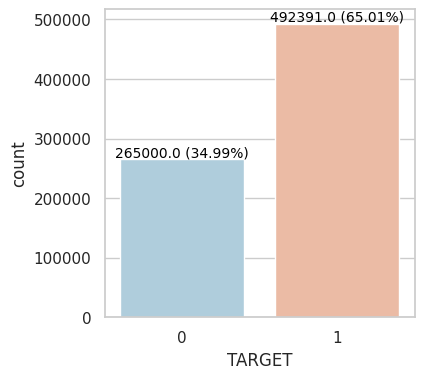

In [86]:
#Mostrando la distribución la variable objetivo "Target" de la data Entrenamiento
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))  # Ajustando el tamaño de la figura si se requiere

# Creando el countplot
ax = sns.countplot(x='TARGET', data=df_entrenamiento_imputado, palette='RdBu_r')

# Calculando y mostrando los porcentajes sobre cada barra del gráfico
total_items = len(df_entrenamiento_imputado)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height / total_items:.2%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

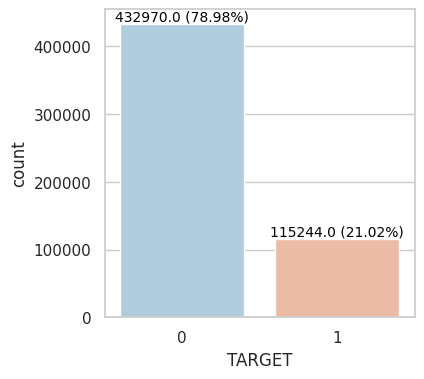

In [87]:
#Mostrando la distribución la variable objetivo "Target" de la data Prueba
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))  # Ajustando el tamaño de la figura si se requiere

# Creando el countplot
ax = sns.countplot(x='TARGET', data=df_prueba_imputado, palette='RdBu_r')

# Calculando y mostrando los porcentajes sobre cada barra del gráfico
total_items = len(df_prueba_imputado)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height / total_items:.2%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

##Graficando la variable objetivo "TARGET" con las variables predictoras


 --- Gráfico Data Entrenamiento para NUMPRIORIZACION vs. TARGET --- 


 --- Gráfico Data Entrenamiento para NC_DISTR12 vs. TARGET --- 


 --- Gráfico Data Entrenamiento para TOTGEST6 vs. TARGET --- 



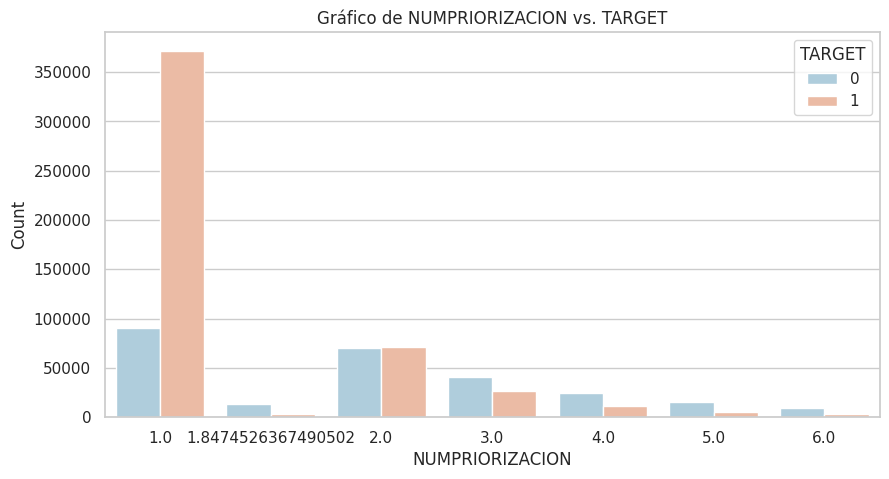

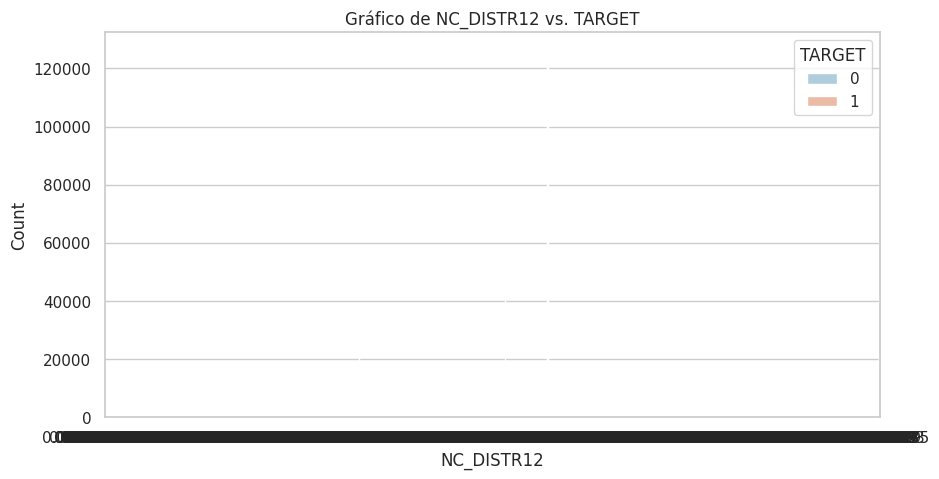

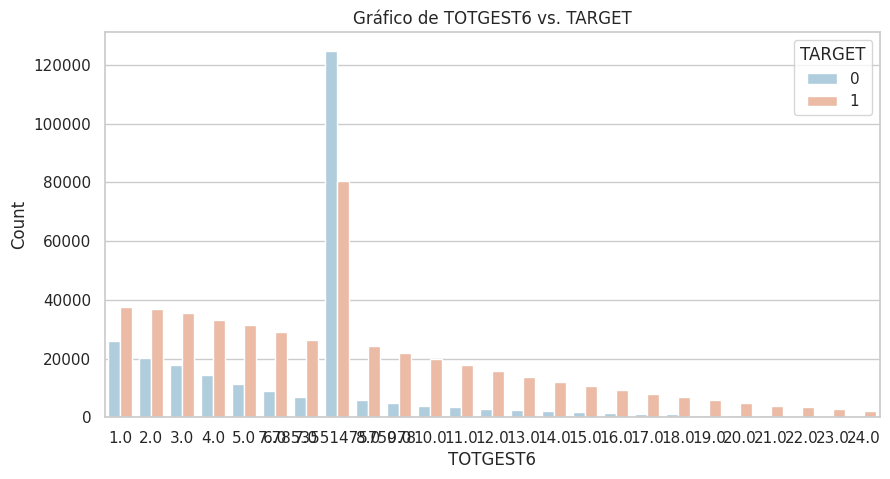

In [90]:
#Graficando la variable objetivo "Target" con las variable numéricas predictoras de la data Entrenamiento
import seaborn as sns
import matplotlib.pyplot as plt

def get_graphic(dataInput, x_variable, hue_variable):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,5)) #ajustando el tamaño de la gráfica según tus necesidades
    ax=sns.countplot(x=x_variable,hue=hue_variable, data=dataInput, palette='RdBu_r')
    plt.title(f'Gráfico de {x_variable} vs. {hue_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.legend(title=hue_variable, loc='upper right')  # Agrega una leyenda
    return ax

variables_numericas= [
    "NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6"]
    #"TOTGEST12", "IDGRUPO",
    #"DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
    #"CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12",
    #"CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
    #"NT_CTD12", "NT_DISTR12", "NT_DIAS12", "NT_CTD6", "NT_DISTR6", "NT_DIAS6",
    #"INGRESO_NETO_VIGENTE", "INGRESO_BRUTO"]

for variable in variables_numericas:
    print (f'\n --- Gráfico Data Entrenamiento para {variable} vs. TARGET --- \n')
    get_graphic(df_entrenamiento_imputado, variable,'TARGET')
    #plt.close() #cierra la figura después de usarla

plt.show()


 --- Gráfico Data Entrenamiento para NUMPRIORIZACION vs. TARGET --- 


 --- Gráfico Data Entrenamiento para NC_DISTR12 vs. TARGET --- 


 --- Gráfico Data Entrenamiento para TOTGEST6 vs. TARGET --- 



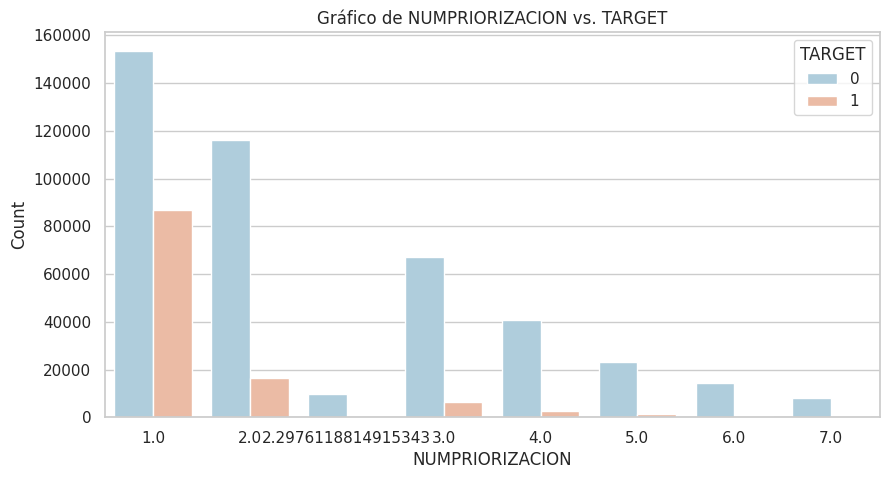

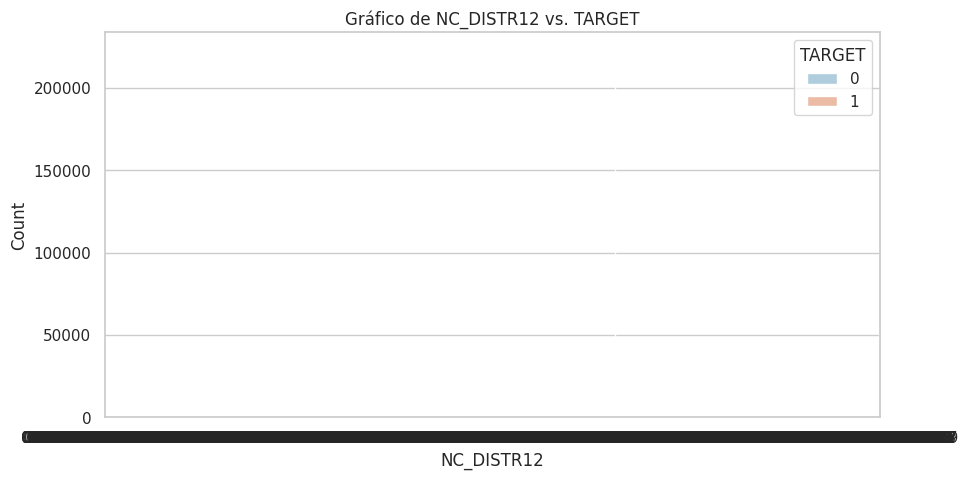

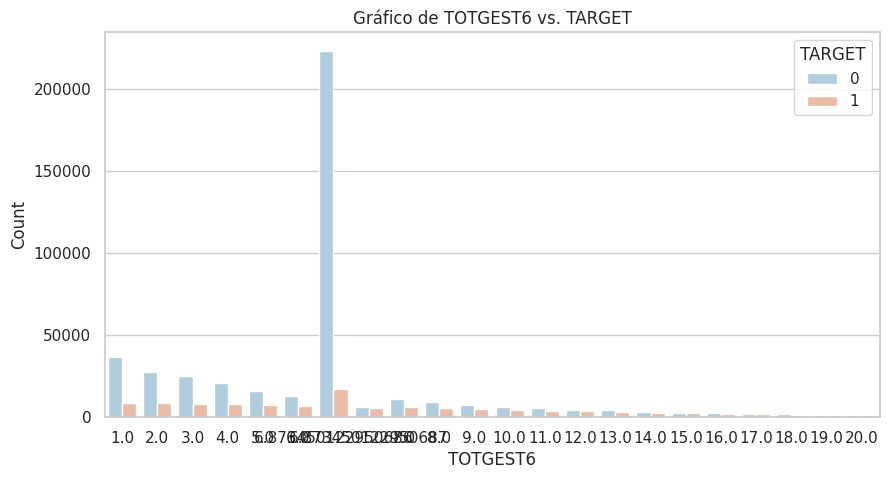

In [92]:
#Graficando la variable objetivo "Target" con las variable numéricas predictoras de la data Prueba
import seaborn as sns
import matplotlib.pyplot as plt

def get_graphic(dataInput, x_variable, hue_variable):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,5)) #ajustando el tamaño de la gráfica según tus necesidades
    ax=sns.countplot(x=x_variable,hue=hue_variable, data=dataInput, palette='RdBu_r')
    plt.title(f'Gráfico de {x_variable} vs. {hue_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.legend(title=hue_variable, loc='upper right')  # Agrega una leyenda
    return ax

variables_numericas= [
    "NUMPRIORIZACION", "NC_DISTR12", "TOTGEST6"]
    #"TOTGEST12", "IDGRUPO",
    #"DIAS_ACT", "DIAS_BEST6", "DIAS_ULT6", "DIAS_BEST12", "DIAS_ULT12",
    #"CNE_CTD12", "CNE_CTD6", "CNE_DIAS6", "CNE_DISTR6", "CNE_DISTR12",
    #"CNE_DIAS12", "NC_CTD12", "NC_DIAS6", "NC_DIAS12", "NC_CTD6", "RECENCIA_APP",
    #"NT_CTD12", "NT_DISTR12", "NT_DIAS12", "NT_CTD6", "NT_DISTR6", "NT_DIAS6",
    #"INGRESO_NETO_VIGENTE", "INGRESO_BRUTO"]

for variable in variables_numericas:
    print (f'\n --- Gráfico Data Entrenamiento para {variable} vs. TARGET --- \n')
    get_graphic(df_prueba_imputado, variable,'TARGET')
    #plt.close() #cierra la figura después de usarla

plt.show()

##Variables Predictoras Cuantitativas


In [88]:
#Data Entrenamiento
df_entrenamiento_imputado.describe()


,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,NC_DIAS6,INGRESO_NETO_VIGENTE
count,757391.000000,757391.000000,757391.000000,757391.000000,757391.000000,757391.000000,757391.000000,757391.000000,757391.000000,757391.000000,757391.000000,757391.000000
mean,1.719163,41.051548,250.865728,0.650115,0.549908,7.383059,53.167309,2.485913,75.954357,0.258663,49.380078,3602.692453
std,1.150291,32.477939,333.012814,0.476934,0.223877,4.655156,40.456522,0.889550,28.767822,0.080195,35.116429,2560.004698
min,1.000000,2.000000,-20.000000,0.000000,0.005435,1.000000,0.000000,1.000000,0.000000,0.010753,0.000000,369.000000
25%,1.000000,4.000000,58.000000,0.000000,0.421053,4.000000,22.000000,2.000000,78.890254,0.270095,22.000000,1636.000000
50%,1.000000,40.000000,133.000000,1.000000,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,52.804809,2764.000000
75%,2.000000,58.000000,304.000000,1.000000,0.600000,8.000000,56.000000,2.655829,78.890254,0.270095,52.804809,4535.000000
max,6.000000,95.000000,1789.000000,1.000000,1.000000,24.000000,191.000000,6.000000,182.000000,0.619048,177.000000,15674.000000


In [89]:
#Data Prueba
df_prueba_imputado.describe()

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,NC_DIAS6,INGRESO_NETO_VIGENTE
count,548214.000000,548214.000000,548214.000000,548214.000000,548214.000000,548214.000000,548214.000000,548214.000000,548214.000000,548214.000000,548214.000000,548214.000000
mean,2.180188,45.939662,425.024703,0.210217,0.650517,6.445687,70.890943,2.391645,85.717959,0.271807,58.959719,3525.260091
std,1.444854,35.287485,540.754043,0.407463,0.209858,3.501263,40.158346,0.635718,21.475068,0.063732,31.150987,2460.688591
min,1.000000,2.000000,0.000000,0.000000,0.022222,1.000000,0.000000,1.000000,7.000000,0.012821,3.000000,311.000000
25%,1.000000,6.000000,98.000000,0.000000,0.600000,4.000000,49.000000,2.526516,87.997269,0.281614,48.000000,1636.000000
50%,2.000000,40.000000,178.000000,0.000000,0.650498,6.873450,72.163084,2.526516,87.997269,0.281614,62.290929,2719.000000
75%,3.000000,90.000000,497.000000,0.000000,0.666667,6.873450,72.163084,2.526516,87.997269,0.281614,62.290929,4414.000000
max,7.000000,95.000000,2255.000000,1.000000,1.000000,20.000000,198.000000,5.000000,169.000000,0.578947,174.000000,14080.000000


In [93]:
df_entrenamiento_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       757391 non-null  float64
 1   IDGRUPO               757391 non-null  int64  
 2   DIAS_ACT              757391 non-null  float64
 3   TARGET                757391 non-null  int64  
 4   NC_DISTR12            757391 non-null  float64
 5   TOTGEST6              757391 non-null  float64
 6   DIAS_BEST6            757391 non-null  float64
 7   CNE_CTD12             757391 non-null  float64
 8   CNE_DIAS6             757391 non-null  float64
 9   CNE_DISTR6            757391 non-null  float64
 10  NC_DIAS6              757391 non-null  float64
 11  INGRESO_NETO_VIGENTE  757391 non-null  float64
 12  FBK_ULT6              757391 non-null  object 
 13  FBK_ULT12             757391 non-null  object 
 14  FBK_BEST6             757391 non-null  object 
 15  

In [94]:
df_prueba_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548214 entries, 0 to 548213
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       548214 non-null  float64
 1   IDGRUPO               548214 non-null  int64  
 2   DIAS_ACT              548214 non-null  float64
 3   TARGET                548214 non-null  int64  
 4   NC_DISTR12            548214 non-null  float64
 5   TOTGEST6              548214 non-null  float64
 6   DIAS_BEST6            548214 non-null  float64
 7   CNE_CTD12             548214 non-null  float64
 8   CNE_DIAS6             548214 non-null  float64
 9   CNE_DISTR6            548214 non-null  float64
 10  NC_DIAS6              548214 non-null  float64
 11  INGRESO_NETO_VIGENTE  548214 non-null  float64
 12  FBK_ULT6              548214 non-null  object 
 13  FBK_ULT12             548214 non-null  object 
 14  FBK_BEST6             548214 non-null  object 
 15  

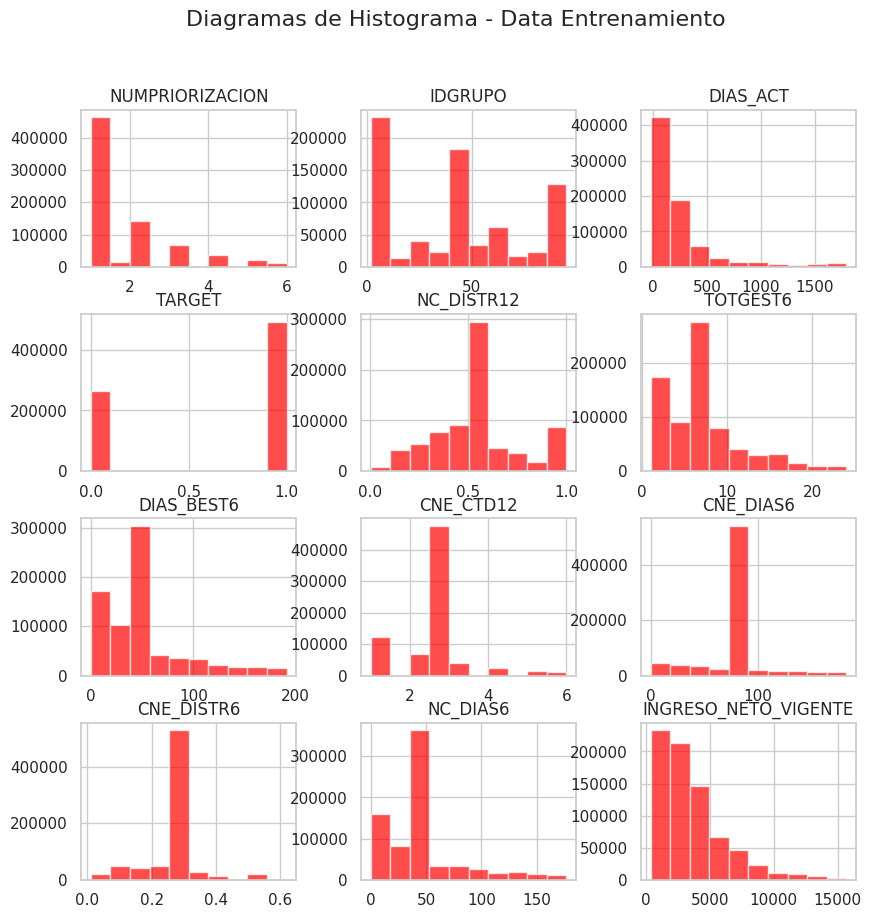

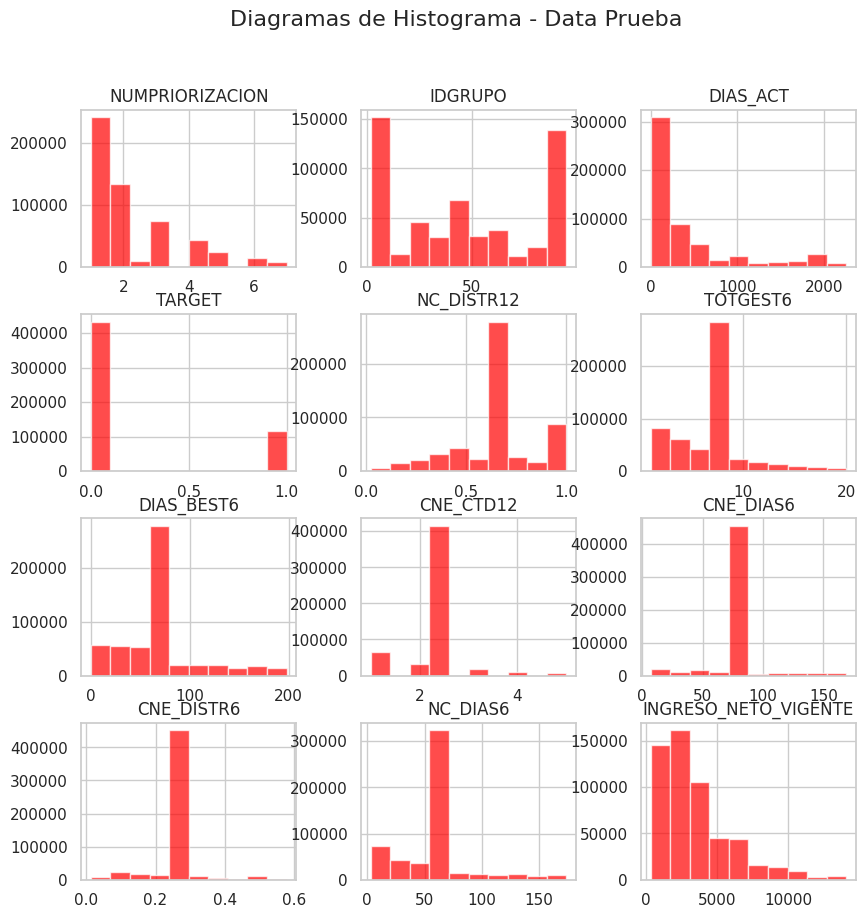

In [95]:
#Diagramas de histograma para la data df_entrenamiento_imputado y df_prueba_imputado

import matplotlib.pyplot as plt
import seaborn as sns

# Data Entrenamiento
df_entrenamiento_imputado.hist(figsize=(10, 10), bins=10, color='red', alpha=0.7)
plt.suptitle('Diagramas de Histograma - Data Entrenamiento', fontsize=16)
plt.show()

# Data Prueba
df_prueba_imputado.hist(figsize=(10, 10), bins=10, color='red', alpha=0.7)
plt.suptitle('Diagramas de Histograma - Data Prueba', fontsize=16)
plt.show()


#Definiendo las mejores variables (gain)

In [98]:
df_data_entrenamiento_para_Gain = df_entrenamiento_imputado

In [100]:
df_data_prueba_para_Gain = df_prueba_imputado

In [101]:
df_data_entrenamiento_para_Gain

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1.0,3,118.0,1,0.333333,6.000000,8.000000,1.000000,114.000000,0.166667,...,TLV,TLV,TLV,TLV,EC,2018-02-08,TACNA,TACNA,2,Entre S/.4000-10000
1,1.0,40,94.0,1,0.461538,13.000000,46.000000,4.000000,15.000000,0.307692,...,TLV,TLV,TLV,TLV,PP,2017-10-18,LIMA,LIMA,1BC,Entre S/.4000-10000
2,1.0,6,223.0,1,0.666667,2.000000,127.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,PA,2018-02-13,LIMA,LIMA,2,Entre S/.1000-4000
3,1.0,95,96.0,1,0.549908,4.000000,49.000000,2.000000,68.000000,0.500000,...,TLV,TLV,TLV,TLV,NC,2018-02-22,LIMA,LIMA,2,Entre S/.1000-4000
4,1.0,4,91.0,1,0.187500,10.000000,27.000000,3.000000,119.000000,0.100000,...,TLV,TLV,TLV,TLV,EC,2017-11-07,CUSCO,CUSCO,3,Entre S/.4000-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2.0,95,99.0,0,1.000000,4.000000,17.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,CD,2017-09-19,CORONEL PORTILLO,UCAYALI,3,Entre S/.4000-10000
757387,1.0,40,66.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,1A,Entre S/.1000-4000
757388,2.0,40,169.0,0,0.500000,2.000000,169.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,2,Entre S/.1000-4000
757389,1.0,3,43.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,C,2017-09-27,LIMA,LIMA,2,Entre S/.1000-4000


In [102]:
df_data_prueba_para_Gain

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1.0,4,85.0,0,0.500000,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,EC,2017-12-04,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
1,2.0,79,34.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-06,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
2,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-26,CORONEL PORTILLO,UCAYALI,1BC,Entre S/.4000-10000
3,1.0,95,98.0,0,0.800000,5.00000,127.000000,1.000000,127.000000,0.200000,...,TLV,TLV,TLV,TLV,NC,2017-12-13,CORONEL PORTILLO,UCAYALI,3,Entre S/.1000-4000
4,1.0,4,8.0,0,0.400000,5.00000,50.000000,3.000000,50.000000,0.281614,...,TLV,TLV,TLV,TLV,C,2017-12-27,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1.0,30,1874.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-13,LIMA,LIMA,5,Entre S/.600-1000
548210,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,2DA,2017-12-13,AREQUIPA,AREQUIPA,1BC,Entre S/.4000-10000
548211,1.0,64,128.0,1,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-06,LIMA,LIMA,3,Sin ingresos
548212,2.0,40,507.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-15,LIMA,LIMA,3,Entre S/.1000-4000


In [104]:
df_data_entrenamiento_para_Gain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       757391 non-null  float64
 1   IDGRUPO               757391 non-null  int64  
 2   DIAS_ACT              757391 non-null  float64
 3   TARGET                757391 non-null  int64  
 4   NC_DISTR12            757391 non-null  float64
 5   TOTGEST6              757391 non-null  float64
 6   DIAS_BEST6            757391 non-null  float64
 7   CNE_CTD12             757391 non-null  float64
 8   CNE_DIAS6             757391 non-null  float64
 9   CNE_DISTR6            757391 non-null  float64
 10  NC_DIAS6              757391 non-null  float64
 11  INGRESO_NETO_VIGENTE  757391 non-null  float64
 12  FBK_ULT6              757391 non-null  object 
 13  FBK_ULT12             757391 non-null  object 
 14  FBK_BEST6             757391 non-null  object 
 15  

In [105]:
df_data_prueba_para_Gain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548214 entries, 0 to 548213
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       548214 non-null  float64
 1   IDGRUPO               548214 non-null  int64  
 2   DIAS_ACT              548214 non-null  float64
 3   TARGET                548214 non-null  int64  
 4   NC_DISTR12            548214 non-null  float64
 5   TOTGEST6              548214 non-null  float64
 6   DIAS_BEST6            548214 non-null  float64
 7   CNE_CTD12             548214 non-null  float64
 8   CNE_DIAS6             548214 non-null  float64
 9   CNE_DISTR6            548214 non-null  float64
 10  NC_DIAS6              548214 non-null  float64
 11  INGRESO_NETO_VIGENTE  548214 non-null  float64
 12  FBK_ULT6              548214 non-null  object 
 13  FBK_ULT12             548214 non-null  object 
 14  FBK_BEST6             548214 non-null  object 
 15  

In [106]:
#Eliminando los duplicados de la DATA TRATADA ENTRENAMIENTO
df_data_entrenamiento_para_Gain.drop_duplicates()
#df.drop_duplicates()

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1.0,3,118.0,1,0.333333,6.000000,8.000000,1.000000,114.000000,0.166667,...,TLV,TLV,TLV,TLV,EC,2018-02-08,TACNA,TACNA,2,Entre S/.4000-10000
1,1.0,40,94.0,1,0.461538,13.000000,46.000000,4.000000,15.000000,0.307692,...,TLV,TLV,TLV,TLV,PP,2017-10-18,LIMA,LIMA,1BC,Entre S/.4000-10000
2,1.0,6,223.0,1,0.666667,2.000000,127.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,PA,2018-02-13,LIMA,LIMA,2,Entre S/.1000-4000
3,1.0,95,96.0,1,0.549908,4.000000,49.000000,2.000000,68.000000,0.500000,...,TLV,TLV,TLV,TLV,NC,2018-02-22,LIMA,LIMA,2,Entre S/.1000-4000
4,1.0,4,91.0,1,0.187500,10.000000,27.000000,3.000000,119.000000,0.100000,...,TLV,TLV,TLV,TLV,EC,2017-11-07,CUSCO,CUSCO,3,Entre S/.4000-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757383,2.0,26,508.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,C,2017-11-06,PROV. CONST. DEL CALLAO,CALLAO,3,Entre S/.1000-4000
757387,1.0,40,66.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,1A,Entre S/.1000-4000
757388,2.0,40,169.0,0,0.500000,2.000000,169.000000,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,NC,2017-09-25,LIMA,LIMA,2,Entre S/.1000-4000
757389,1.0,3,43.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,TLV,TLV,TLV,TLV,C,2017-09-27,LIMA,LIMA,2,Entre S/.1000-4000


In [107]:
#Eliminando los duplicados de la DATA TRATADA PRUEBA
df_data_prueba_para_Gain.drop_duplicates()
#df.drop_duplicates()

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,FBK_ULT6,FBK_ULT12,FBK_BEST6,FBK_BEST12,COD_SALA,FEC_LLAMADA,PROVINCIA,DEPARTAMENTO,SEGMENTO,RANGO_INGRESOS
0,1.0,4,85.0,0,0.500000,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,EC,2017-12-04,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
1,2.0,79,34.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-06,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
2,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,CON,2017-12-26,CORONEL PORTILLO,UCAYALI,1BC,Entre S/.4000-10000
3,1.0,95,98.0,0,0.800000,5.00000,127.000000,1.000000,127.000000,0.200000,...,TLV,TLV,TLV,TLV,NC,2017-12-13,CORONEL PORTILLO,UCAYALI,3,Entre S/.1000-4000
4,1.0,4,8.0,0,0.400000,5.00000,50.000000,3.000000,50.000000,0.281614,...,TLV,TLV,TLV,TLV,C,2017-12-27,CORONEL PORTILLO,UCAYALI,2,Entre S/.1000-4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1.0,30,1874.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-13,LIMA,LIMA,5,Entre S/.600-1000
548210,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,2DA,2017-12-13,AREQUIPA,AREQUIPA,1BC,Entre S/.4000-10000
548211,1.0,64,128.0,1,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-06,LIMA,LIMA,3,Sin ingresos
548212,2.0,40,507.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,TLV,TLV,TLV,TLV,NC,2017-12-15,LIMA,LIMA,3,Entre S/.1000-4000


In [110]:
#Listando variables para DATA TRATADA ENTRENAMIENTO
df_data_entrenamiento_para_Gain.columns

Index(['NUMPRIORIZACION', 'IDGRUPO', 'DIAS_ACT', 'TARGET', 'NC_DISTR12',
       'TOTGEST6', 'DIAS_BEST6', 'CNE_CTD12', 'CNE_DIAS6', 'CNE_DISTR6',
       'NC_DIAS6', 'INGRESO_NETO_VIGENTE', 'FBK_ULT6', 'FBK_ULT12',
       'FBK_BEST6', 'FBK_BEST12', 'COD_SALA', 'FEC_LLAMADA', 'PROVINCIA',
       'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'],
      dtype='object')

In [111]:
#Listando variables para DATA TRATADA PRUEBA
df_data_prueba_para_Gain.columns

Index(['NUMPRIORIZACION', 'IDGRUPO', 'DIAS_ACT', 'TARGET', 'NC_DISTR12',
       'TOTGEST6', 'DIAS_BEST6', 'CNE_CTD12', 'CNE_DIAS6', 'CNE_DISTR6',
       'NC_DIAS6', 'INGRESO_NETO_VIGENTE', 'FBK_ULT6', 'FBK_ULT12',
       'FBK_BEST6', 'FBK_BEST12', 'COD_SALA', 'FEC_LLAMADA', 'PROVINCIA',
       'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'],
      dtype='object')

In [112]:
#Variables dummies
#variables_categoricas.columns
df_data_entrenamiento_dummies = pd.get_dummies(df_data_entrenamiento_para_Gain, columns=['FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'FBK_BEST12', 'PROVINCIA', 'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'], dtype=int)
df_data_entrenamiento_dummies

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,SEGMENTO_3,SEGMENTO_4,SEGMENTO_5,SEGMENTO_6,RANGO_INGRESOS_Entre S/.0-600,RANGO_INGRESOS_Entre S/.1000-4000,RANGO_INGRESOS_Entre S/.4000-10000,RANGO_INGRESOS_Entre S/.600-1000,RANGO_INGRESOS_Mayor a S/.10000,RANGO_INGRESOS_Sin ingresos
0,1.0,3,118.0,1,0.333333,6.000000,8.000000,1.000000,114.000000,0.166667,...,0,0,0,0,0,0,1,0,0,0
1,1.0,40,94.0,1,0.461538,13.000000,46.000000,4.000000,15.000000,0.307692,...,0,0,0,0,0,0,1,0,0,0
2,1.0,6,223.0,1,0.666667,2.000000,127.000000,2.655829,78.890254,0.270095,...,0,0,0,0,0,1,0,0,0,0
3,1.0,95,96.0,1,0.549908,4.000000,49.000000,2.000000,68.000000,0.500000,...,0,0,0,0,0,1,0,0,0,0
4,1.0,4,91.0,1,0.187500,10.000000,27.000000,3.000000,119.000000,0.100000,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757386,2.0,95,99.0,0,1.000000,4.000000,17.000000,2.655829,78.890254,0.270095,...,1,0,0,0,0,0,1,0,0,0
757387,1.0,40,66.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,0,0,0,0,0,1,0,0,0,0
757388,2.0,40,169.0,0,0.500000,2.000000,169.000000,2.655829,78.890254,0.270095,...,0,0,0,0,0,1,0,0,0,0
757389,1.0,3,43.0,0,0.549908,7.785355,55.970856,2.655829,78.890254,0.270095,...,0,0,0,0,0,1,0,0,0,0


In [113]:
#Variables dummies
#variables_categoricas.columns
df_data_prueba_dummies = pd.get_dummies(df_data_prueba_para_Gain, columns=['FBK_ULT6', 'FBK_ULT12', 'FBK_BEST6', 'FBK_BEST12', 'PROVINCIA', 'DEPARTAMENTO', 'SEGMENTO', 'RANGO_INGRESOS'], dtype=int)
df_data_prueba_dummies

,NUMPRIORIZACION,IDGRUPO,DIAS_ACT,TARGET,NC_DISTR12,TOTGEST6,DIAS_BEST6,CNE_CTD12,CNE_DIAS6,CNE_DISTR6,...,SEGMENTO_3,SEGMENTO_4,SEGMENTO_5,SEGMENTO_6,RANGO_INGRESOS_Entre S/.0-600,RANGO_INGRESOS_Entre S/.1000-4000,RANGO_INGRESOS_Entre S/.4000-10000,RANGO_INGRESOS_Entre S/.600-1000,RANGO_INGRESOS_Mayor a S/.10000,RANGO_INGRESOS_Sin ingresos
0,1.0,4,85.0,0,0.500000,6.87345,72.163084,2.526516,87.997269,0.281614,...,0,0,0,0,0,1,0,0,0,0
1,2.0,79,34.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,0,0,0,0,0,1,0,0,0,0
2,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,0,0,0,0,0,0,1,0,0,0
3,1.0,95,98.0,0,0.800000,5.00000,127.000000,1.000000,127.000000,0.200000,...,1,0,0,0,0,1,0,0,0,0
4,1.0,4,8.0,0,0.400000,5.00000,50.000000,3.000000,50.000000,0.281614,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548209,1.0,30,1874.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,0,0,1,0,0,0,0,1,0,0
548210,1.0,95,62.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,0,0,0,0,0,0,1,0,0,0
548211,1.0,64,128.0,1,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,1,0,0,0,0,0,0,0,0,1
548212,2.0,40,507.0,0,0.650498,6.87345,72.163084,2.526516,87.997269,0.281614,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
#Falta balanceo
#ME QUEDÉ AQUÍ
#
#
#
#
#
#
#
#
#


#Balanceo de datos si es necesario y si es necesario elegir un grupo de variables con el gain

### Selección de muestras de entrenamiento y validación

In [ ]:
# Prepara la data

X,y = dataset.drop(['ID', 'SeriousDlqin2yrs'], axis=1),dataset[["SeriousDlqin2yrs"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1,stratify=y)

### Regresión Logística

In [ ]:
model_RL = LogisticRegression()
model_RL.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_rl = model_RL.predict_proba(X_train)[:,1]
predict_test_rl = model_RL.predict_proba(X_test)[:,1]


# Print scores on both  predict_proba(best_X_train)[:,1]
print("auc on training in LogisticRegression data : {:.3f}".format(roc_auc_score(y_train, predict_train_rl) ))
print("auc on testing in LogisticRegression  data : {:.3f}".format(roc_auc_score(y_test, predict_test_rl) ))

auc on training in LogisticRegression data : 0.681
auc on testing in LogisticRegression  data : 0.679


In [ ]:
model_RL.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
predict_train_rl

array([0.15391201, 0.01284115, 0.10221353, ..., 0.09217361, 0.14028766,
       0.0052841 ])

In [ ]:
clasificacion_predict_train_logit= np.where(predict_train_rl<0.5, 0, 1)
clasificacion_predict_test_logit= np.where(predict_test_rl<0.5, 0, 1)

print("accuracy on training in LogisticRegression data : {:.3f}".format(accuracy_score(y_train, clasificacion_predict_train_logit)))
print("accuracy on testing in LogisticRegression  data : {:.3f}".format(accuracy_score(y_test,clasificacion_predict_test_logit)))

accuracy on training in LogisticRegression data : 0.933
accuracy on testing in LogisticRegression  data : 0.933


### Árboles de desición

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_dt = model_DT.predict_proba(X_train)[:,1]
predict_test_dt = model_DT.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in DecisionTree data : {:.3f}".format(roc_auc_score(y_train, predict_train_dt) ))
print("auc on testing in DecisionTree  data : {:.3f}".format(roc_auc_score(y_test, predict_test_dt) ))

auc on training in DecisionTree data : 1.000
auc on testing in DecisionTree  data : 0.614


In [ ]:
# Clasificación predicha
clasificacion_predict_train_dt= np.where(predict_train_dt<0.5, 0, 1)
clasificacion_predict_test_dt= np.where(predict_test_dt<0.5, 0, 1)

print("accuracy on training in DecisionTreeClassifier data : {:.3f}".format(accuracy_score(y_train, clasificacion_predict_train_dt)))
print("accuracy on testing in DecisionTreeClassifier  data : {:.3f}".format(accuracy_score(y_test,clasificacion_predict_test_dt)))

accuracy on training in DecisionTreeClassifier data : 1.000
accuracy on testing in DecisionTreeClassifier  data : 0.897


### Red Neuronal

In [ ]:
model_RN = MLPClassifier()
model_RN.fit(X_train, y_train)


# Separate the features and the target variable
predict_train_rn = model_RN.predict_proba(X_train)[:,1]
predict_test_rn = model_RN.predict_proba(X_test)[:,1]


# Print scores on both
print("auc on training in Red Neuronal data : {:.3f}".format(roc_auc_score(y_train, predict_train_rn) ))
print("auc on testing in Red Neuronal  data : {:.3f}".format(roc_auc_score(y_test, predict_test_rn) ))

auc on training in Red Neuronal data : 0.738
auc on testing in Red Neuronal  data : 0.731


In [ ]:
# Clasificación predicha
clasificacion_predict_train_rn= np.where(predict_train_rn<0.5, 0, 1)
clasificacion_predict_test_rn= np.where(predict_test_rn<0.5, 0, 1)

print("accuracy on training in Red Neuronal data : {:.3f}".format(accuracy_score(y_train, clasificacion_predict_train_rn)))
print("accuracy on testing in Red Neuronal  data : {:.3f}".format(accuracy_score(y_test,clasificacion_predict_test_rn)))

accuracy on training in Red Neuronal data : 0.574
accuracy on testing in Red Neuronal  data : 0.571


### Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('lg', model_RL), ('Tree', model_DT), ('rn', model_RN)], voting='hard')
model.fit(X_train,y_train)

VotingClassifier(estimators=[('lg', LogisticRegression()),
                             ('Tree', DecisionTreeClassifier()),
                             ('rn', MLPClassifier())])

In [ ]:
VotingClassifier_test_pred = model.predict(X_test)

# Print scores on both
print("accuracy on testing in VotingClassifier  data : {:.3f}".format(accuracy_score(y_test, VotingClassifier_test_pred)))

accuracy on testing in VotingClassifier  data : 0.934


### Averaging

In [ ]:
finalpred_Averaging = (predict_test_rl+predict_test_dt+predict_test_rn)/3

print("auc on testing in Averaging  data : {:.3f}".format(roc_auc_score(y_test, finalpred_Averaging)))

auc on testing in Averaging  data : 0.756


### Weighted Average

In [ ]:
finalpred_W_Averaging = (predict_test_rn*0.5+predict_test_dt*0.2+predict_test_rl*0.3)/3

print("auc on testing in Weighted Average  data : {:.3f}".format(roc_auc_score(y_test, finalpred_W_Averaging)))

auc on testing in Weighted Average  data : 0.753


### Stacking

In [ ]:
estimators = [('lg', model_RL), ('Tree', model_DT), ('rn', model_RN)]

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
stacking = StackingClassifier(
 estimators=estimators, final_estimator=LogisticRegression()
 )

In [ ]:
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('lg', LogisticRegression()),
                               ('Tree', DecisionTreeClassifier()),
                               ('rn', MLPClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
stacking_test_pred = stacking.predict(X_test)
stacking_test_prod = stacking.predict_proba(X_test)[:,1]

# Print scores on both
print("accuracy on testing in Stacking  data : {:.3f}".format(accuracy_score(y_test, stacking_test_pred)))
print("auc on testing in Stacking  data : {:.3f}".format(roc_auc_score(y_test, stacking_test_prod)))

accuracy on testing in Stacking  data : 0.934
auc on testing in Stacking  data : 0.741


### Ahora usaremos Bagging

In [ ]:
bagging = BaggingClassifier(n_estimators=50,random_state=0)
bagging.fit(X_train, y_train)
# Separate the features and the target variable
bagging_test_pred = bagging.predict(X_test)
bagging_test_prob = bagging.predict_proba(X_test)[:,1]

# Print scores on both
print("accuracy on testing in BaggingClassifier  data : {:.3f}".format(accuracy_score(y_test, bagging_test_pred)))
print("auc on testing in BaggingClassifier  data : {:.3f}".format(roc_auc_score(y_test, bagging_test_prob)))

accuracy on testing in BaggingClassifier  data : 0.933
auc on testing in BaggingClassifier  data : 0.824


### Random Forest

In [ ]:
rf = RandomForestClassifier(
 random_state      = 0,   # semilla inicial de aleatoriedad del algoritmo
 n_estimators      = 100, # cantidad de arboles a crear
 min_samples_split = 5,   # cantidad minima de observaciones para dividir un nodo
 min_samples_leaf  = 2,   # observaciones minimas que puede tener una hoja del arbol
 n_jobs            = -1    # tareas en paralelo. para todos los cores disponibles usar -1
 )

rf.fit(X_train, y_train)

rf_test_pred = rf.predict(X_test)
rf_test_prob = rf.predict_proba(X_test)[:,1]

# Print scores on both
print("accuracy on testing in RandomForestClassifier  data : {:.3f}".format(accuracy_score(y_test, rf_test_pred)))
print("auc on testing in RandomForestClassifier  data : {:.3f}".format(roc_auc_score(y_test, rf_test_prob)))

accuracy on testing in RandomForestClassifier  data : 0.935
auc on testing in RandomForestClassifier  data : 0.846


## Validacion -cruzada con Kfolds

In [ ]:
data_train = pd.concat([X_train,  y_train], axis=1).reset_index(drop=True)
data_test = pd.concat([X_test,  y_test], axis=1).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

i=1

r=[]

features = X_train.columns
target = 'SeriousDlqin2yrs'

importancias=pd.DataFrame()

importancias['variable']=features

i=1


for train_index, test_index in kf.split(data_train[features],data_train[target]):

    rf_cv=RandomForestClassifier(n_estimators = 100,min_samples_split = 5,min_samples_leaf  = 2, random_state = 1)

    rf_cv.fit(data_train.loc[train_index,features],data_train.loc[train_index,target])
    data_test["FOLD_"+str(i)] = rf_cv.predict_proba(data_test[features])[:,1]



    print ("Fold_"+str(i))
    a= roc_auc_score(data_train.loc[test_index,target],np.expm1(rf_cv.predict_proba(data_train.loc[test_index,features])[:,1]))
    r.append(a)
    print (a)
    print ("")

    importancias['gain_'+str(i)]=rf_cv.feature_importances_

    i=i+1

w=[x for x in importancias.columns if 'gain_' in x]

importancias['gain-avg']=importancias[w].mean(axis=1)

importancias=importancias.sort_values('gain-avg',ascending=False).reset_index(drop=True)

importancias=importancias[['variable']+w+['gain-avg']]


print ("mean: "+str(np.mean(np.array(r))))
print ("std: "+str(np.std(np.array(r))))

Fold_1
0.8517649338810276

Fold_2
0.8500606150158289

Fold_3
0.8406779071140196

Fold_4
0.8532444946453833

Fold_5
0.8551806062096934

mean: 0.8501857113731905
std: 0.005044067092982864


In [ ]:
data_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,FOLD_1,FOLD_2,FOLD_3,FOLD_4,FOLD_5
0,0.534155,56,0,0.339333,14000.0,11,0,1,0,3.0,0,0.038095,0.029500,0.023262,0.042000,0.030667
1,1.004680,24,0,0.352465,1480.0,4,0,0,0,0.0,0,0.058286,0.095560,0.199889,0.119921,0.162778
2,0.929007,36,0,9.864000,124.0,11,0,1,0,2.0,0,0.121512,0.152091,0.156750,0.110810,0.141338
3,0.998002,30,1,0.730129,2100.0,4,0,0,0,6.0,1,0.248503,0.173421,0.195277,0.215431,0.260429
4,1.000000,43,3,0.699003,2607.0,3,1,1,0,2.0,0,0.469413,0.590690,0.606833,0.472226,0.647353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,0.461766,60,0,1284.000000,5400.0,11,0,0,0,0.0,0,0.052750,0.049762,0.054083,0.056333,0.105083
37496,0.190672,65,0,0.887819,5294.0,27,0,3,0,1.0,0,0.011667,0.003537,0.003710,0.018429,0.010357
37497,0.060226,37,0,3549.000000,5400.0,12,0,2,0,0.0,0,0.003509,0.013307,0.020274,0.012381,0.007273
37498,0.021249,82,0,0.106298,3000.0,6,0,0,0,0.0,0,0.000000,0.000000,0.000504,0.000000,0.000000


In [ ]:
w=[x for x in data_test.columns if 'FOLD' in x]

data_test['Predict']=data_test[w].mean(axis=1)

In [ ]:
clasificacion_predict_test_rf_cv= np.where(data_test.Predict<0.5, 0, 1)

print("auc on training in RF CV data : {:.3f}".format(roc_auc_score(data_test.SeriousDlqin2yrs, data_test.Predict)))
print("accuracy on testing in RF CV   data : {:.3f}".format(accuracy_score(data_test.SeriousDlqin2yrs,clasificacion_predict_test_rf_cv)))

auc on training in RF CV data : 0.851
accuracy on testing in RF CV   data : 0.935
